# Predicting Breast Cancer in a patient

### Abstract
Breast cancer represents one of the diseases that make a high number of deaths every year. It is the most common type of all cancers and the main cause of women's deaths worldwide. Classification and data mining methods are an effective way to classify data. Especially in the medical field, where those methods are widely used in diagnosis and analysis to make decisions. 
### Problem Statement
Given the details of cell nuclei taken from breast mass, predict whether or not a patient has breast cancer using the Ensembling Techniques. Perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy. 
### Dataset Information
The dataset consists of several predictor variables and one target variable, Diagnosis. The target variable has values 'Benign' and 'Malignant', where 'Benign' means that the cells are not harmful or there is no cancer and 'Malignant' means that the patient has cancer and the cells have a harmful effect

* __radius__ : Mean of distances from center to points on the perimeter
* __texture__ : Standard deviation of gray-scale values
* __perimeter__ : Observed perimeter of the lump
* __area__ : Observed area of lump
* __smoothness__ : Local variation in radius lengths
* __compactness__ : perimeter^2 / area - 1.0
* __concavity__ : Severity of concave portions of the contour
* __concave_points__ : number of concave portions of the contour
* __symmetry__ : Lump symmetry
* __fractal dimension__ : "coastline approximation" - 1
* __Diagnosis__ : Whether the patient has cancer or not? ('Malignant','Benign')

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

# Assigning Working Directory

In [1]:
import os
os.chdir('C:/Users/Darshan/Desktop/Breast_Cancer_Prediction/')

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth',None)

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [4]:
df = pd.read_csv('C:/Users/Darshan/Desktop/Breast_Cancer_Prediction/Dataset/cancer.csv')

In [5]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Removing 'Unnamed: 32' column

df.drop('Unnamed: 32', axis=1, inplace=True)

In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Removal of Outliers

In [11]:
def outliers(col, data):
    if data[col].dtype != 'O':
        
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        ub = Q3 + 1.5*IQR
        lb = Q1 - 1.5*IQR
        
        ol_ub = sum(data[col]>ub)
        ol_lb = sum(data[col]<lb)
        
        print('Upper bound: ', ub)
        print('Lower bound: ', lb)
        print('\n')
        print('Number of outliers above upper bound: ', ol_ub)
        print('Number of outliers below lower bound: ', ol_lb)
        print('Percentage of outliers: ', round((ol_ub+ol_lb)/len(df) * 100,4), '%')
    else: 
        print(f'{col} is not a numeric variable')

#### radius_mean

In [12]:
df['radius_mean'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

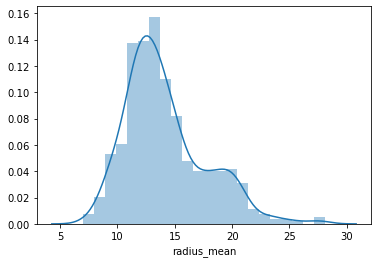

In [13]:
sns.distplot(df['radius_mean'])

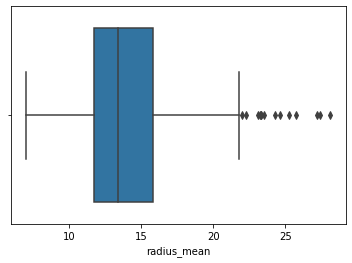

In [14]:
sns.boxplot(df['radius_mean'])

In [15]:
outliers('radius_mean', df)

Upper bound:  21.9
Lower bound:  5.579999999999999


Number of outliers above upper bound:  14
Number of outliers below lower bound:  0
Percentage of outliers:  2.4605 %


In [16]:
# Since we only have 569 observations, we cant afford to remove the outliers, so we can assign the outliers to upper or
# lower bound.

df['radius_mean'][df['radius_mean']>21.9] = 21.9

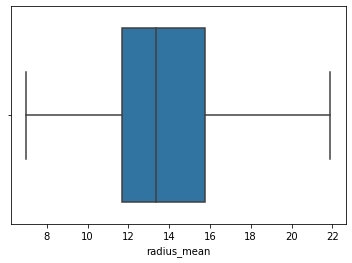

In [17]:
sns.boxplot(df['radius_mean'])

In [18]:
outliers('radius_mean', df)

Upper bound:  21.9
Lower bound:  5.579999999999999


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### texture_mean

In [19]:
df['texture_mean'].describe()

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64

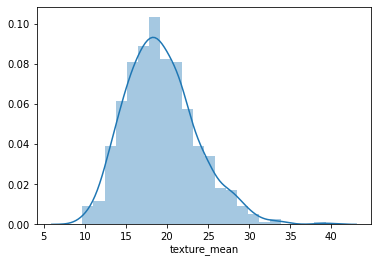

In [20]:
sns.distplot(df['texture_mean'])

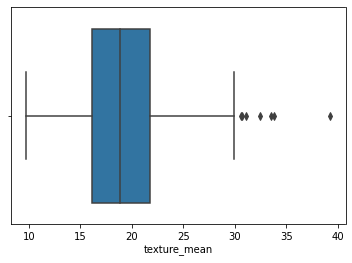

In [21]:
sns.boxplot(df['texture_mean'])

In [22]:
outliers('texture_mean', df)

Upper bound:  30.244999999999997
Lower bound:  7.725000000000003


Number of outliers above upper bound:  7
Number of outliers below lower bound:  0
Percentage of outliers:  1.2302 %


In [23]:
df['texture_mean'][df['texture_mean']>30.244999999999997] = 30.244999999999997

In [24]:
outliers('texture_mean', df)

Upper bound:  30.244999999999997
Lower bound:  7.725000000000003


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### perimeter_mean

In [25]:
df['perimeter_mean'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

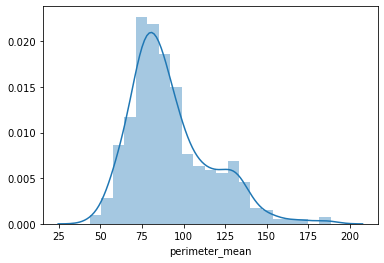

In [26]:
sns.distplot(df['perimeter_mean'])

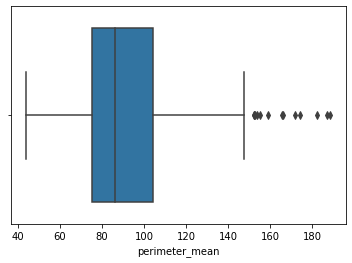

In [27]:
sns.boxplot(df['perimeter_mean'])

In [28]:
outliers('perimeter_mean', df)

Upper bound:  147.49499999999998
Lower bound:  31.775000000000013


Number of outliers above upper bound:  13
Number of outliers below lower bound:  0
Percentage of outliers:  2.2847 %


In [29]:
df['perimeter_mean'][df['perimeter_mean']>147.49499999999998] = 147.49499999999998

In [30]:
outliers('perimeter_mean', df)

Upper bound:  147.49499999999998
Lower bound:  31.775000000000013


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### area_mean

In [31]:
df['area_mean'].describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64

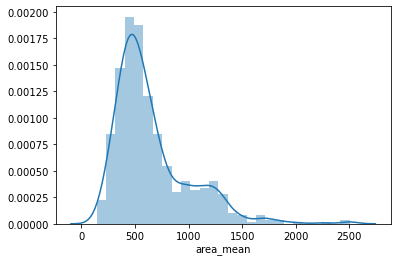

In [32]:
sns.distplot(df['area_mean'])

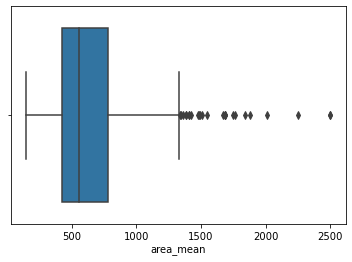

In [33]:
sns.boxplot(df['area_mean'])

In [34]:
outliers('area_mean', df)

Upper bound:  1326.3000000000002
Lower bound:  -123.30000000000001


Number of outliers above upper bound:  25
Number of outliers below lower bound:  0
Percentage of outliers:  4.3937 %


In [35]:
df['area_mean'][df['area_mean']>1326.3] = 1326.3

In [36]:
outliers('area_mean', df)

Upper bound:  1326.3000000000002
Lower bound:  -123.30000000000001


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### smoothness_mean

In [37]:
df.smoothness_mean.describe()

count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness_mean, dtype: float64

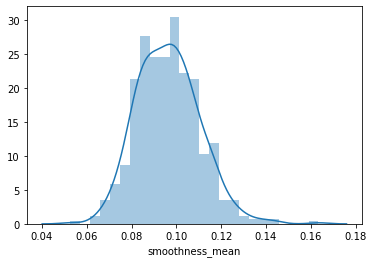

In [38]:
sns.distplot(df.smoothness_mean)

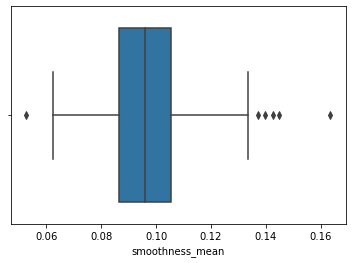

In [39]:
sns.boxplot(df.smoothness_mean)

In [40]:
outliers('smoothness_mean', df)

Upper bound:  0.133695
Lower bound:  0.057975


Number of outliers above upper bound:  5
Number of outliers below lower bound:  1
Percentage of outliers:  1.0545 %


In [41]:
df['smoothness_mean'][df['smoothness_mean']>0.133695] = 0.133695

df['smoothness_mean'][df['smoothness_mean']<0.057975] = 0.057975

In [42]:
outliers('smoothness_mean', df)

Upper bound:  0.133695
Lower bound:  0.057975


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### compactness_mean

In [43]:
df.compactness_mean.describe()

count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: compactness_mean, dtype: float64

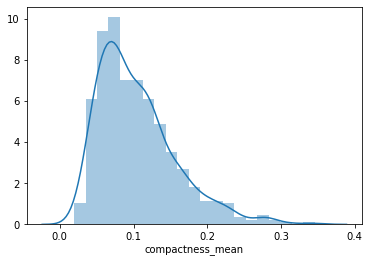

In [44]:
sns.distplot(df.compactness_mean)

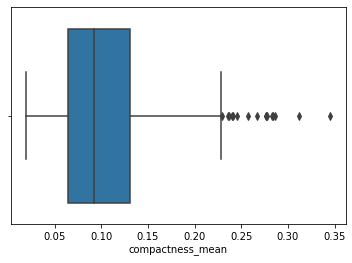

In [45]:
sns.boxplot(df.compactness_mean)

In [46]:
outliers('compactness_mean', df)

Upper bound:  0.22861999999999996
Lower bound:  -0.03329999999999997


Number of outliers above upper bound:  16
Number of outliers below lower bound:  0
Percentage of outliers:  2.812 %


In [47]:
df['compactness_mean'][df['compactness_mean']>0.22861999999999996] = 0.22861999999999996

In [48]:
outliers('compactness_mean', df)

Upper bound:  0.22861999999999996
Lower bound:  -0.03329999999999997


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### concavity_mean

In [49]:
df.concavity_mean.describe()

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64

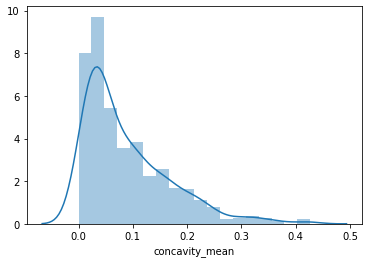

In [50]:
sns.distplot(df.concavity_mean)

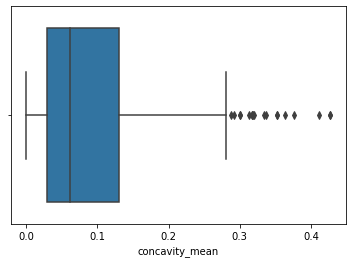

In [51]:
sns.boxplot(df.concavity_mean)

In [52]:
outliers('concavity_mean', df)

Upper bound:  0.28241000000000005
Lower bound:  -0.12215000000000001


Number of outliers above upper bound:  18
Number of outliers below lower bound:  0
Percentage of outliers:  3.1634 %


In [53]:
df['concavity_mean'][df['concavity_mean']>0.28241000000000005] = 0.28241000000000005

In [54]:
outliers('concavity_mean', df)

Upper bound:  0.28241000000000005
Lower bound:  -0.12215000000000001


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### concave_points_mean

In [55]:
df['concave points_mean'].describe()

count    569.000000
mean       0.048919
std        0.038803
min        0.000000
25%        0.020310
50%        0.033500
75%        0.074000
max        0.201200
Name: concave points_mean, dtype: float64

In [56]:
# Renaming the column.
df = df.rename({'concave points_mean': 'concave_points_mean'}, axis=1)

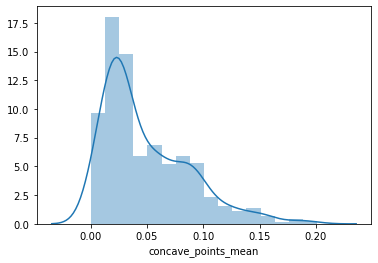

In [57]:
sns.distplot(df['concave_points_mean'])

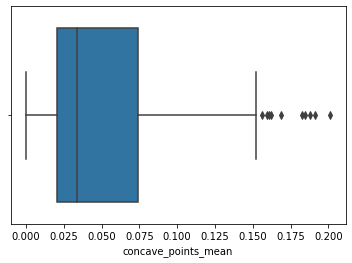

In [58]:
sns.boxplot(df['concave_points_mean'])

In [59]:
outliers('concave_points_mean', df)

Upper bound:  0.15453500000000003
Lower bound:  -0.06022500000000003


Number of outliers above upper bound:  10
Number of outliers below lower bound:  0
Percentage of outliers:  1.7575 %


In [60]:
df['concave_points_mean'][df['concave_points_mean']>0.154535] = 0.154535

In [61]:
outliers('concave_points_mean', df)

Upper bound:  0.15453500000000003
Lower bound:  -0.06022500000000003


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### symmetry_mean

In [62]:
df['symmetry_mean'].describe()

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: symmetry_mean, dtype: float64

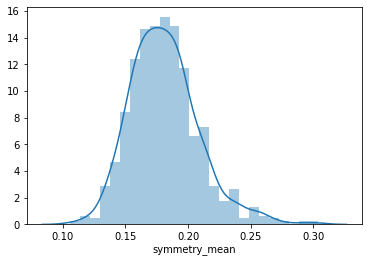

In [63]:
sns.distplot(df.symmetry_mean)

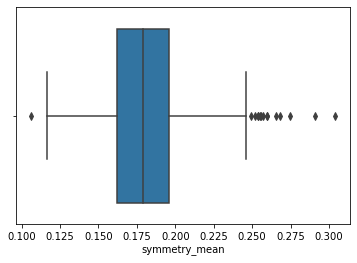

In [64]:
sns.boxplot(df.symmetry_mean)

In [65]:
outliers('symmetry_mean', df)

Upper bound:  0.24640000000000006
Lower bound:  0.11119999999999995


Number of outliers above upper bound:  14
Number of outliers below lower bound:  1
Percentage of outliers:  2.6362 %


In [66]:
df['symmetry_mean'][df['symmetry_mean']>0.24640000000000006] = 0.24640000000000006

df['symmetry_mean'][df['symmetry_mean']<0.11119999999999995] = 0.11119999999999995

In [67]:
outliers('symmetry_mean', df)

Upper bound:  0.24640000000000006
Lower bound:  0.11119999999999995


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### fractal_dimension_mean

In [68]:
df.fractal_dimension_mean.describe()

count    569.000000
mean       0.062798
std        0.007060
min        0.049960
25%        0.057700
50%        0.061540
75%        0.066120
max        0.097440
Name: fractal_dimension_mean, dtype: float64

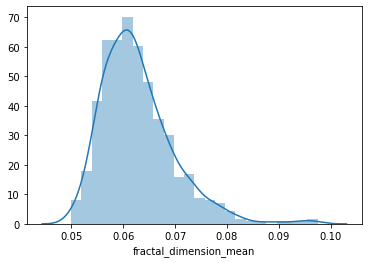

In [69]:
sns.distplot(df.fractal_dimension_mean)

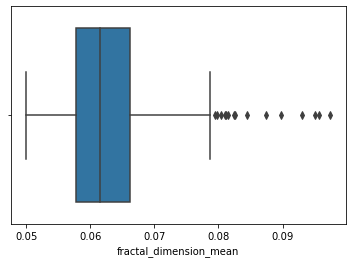

In [70]:
sns.boxplot(df.fractal_dimension_mean)

In [71]:
outliers('fractal_dimension_mean', df)

Upper bound:  0.07874999999999999
Lower bound:  0.045070000000000006


Number of outliers above upper bound:  15
Number of outliers below lower bound:  0
Percentage of outliers:  2.6362 %


In [72]:
df['fractal_dimension_mean'][df['fractal_dimension_mean']>0.07874999999999999] = 0.07874999999999999

In [73]:
outliers('fractal_dimension_mean', df)

Upper bound:  0.07874999999999999
Lower bound:  0.045070000000000006


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### radius_se

In [74]:
df.radius_se.describe()

count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: radius_se, dtype: float64

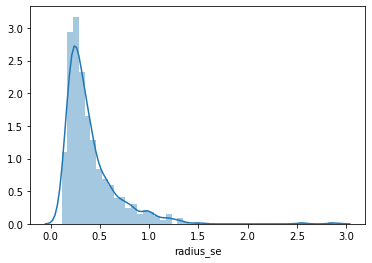

In [75]:
sns.distplot(df.radius_se)

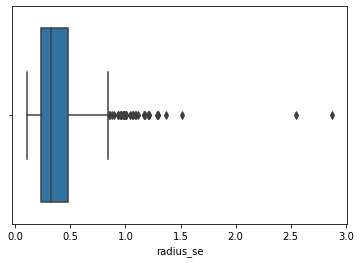

In [76]:
sns.boxplot(df.radius_se)

In [77]:
outliers('radius_se', df)

Upper bound:  0.84865
Lower bound:  -0.13735000000000003


Number of outliers above upper bound:  38
Number of outliers below lower bound:  0
Percentage of outliers:  6.6784 %


In [78]:
df['radius_se'][df['radius_se']>0.84865] = 0.84865

In [79]:
outliers('radius_se', df)

Upper bound:  0.84865
Lower bound:  -0.13735000000000003


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### texture_se

In [80]:
df.texture_se.describe()

count    569.000000
mean       1.216853
std        0.551648
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        4.885000
Name: texture_se, dtype: float64

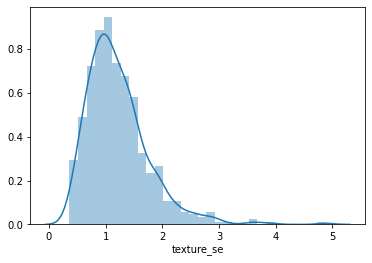

In [81]:
sns.distplot(df.texture_se)

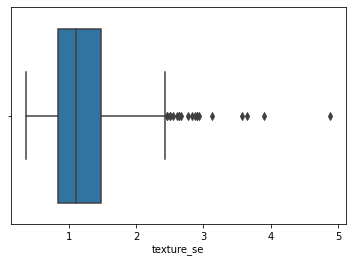

In [82]:
sns.boxplot(df.texture_se)

In [83]:
outliers('texture_se', df)

Upper bound:  2.43415
Lower bound:  -0.12625000000000008


Number of outliers above upper bound:  20
Number of outliers below lower bound:  0
Percentage of outliers:  3.5149 %


In [84]:
df['texture_se'][df['texture_se']>2.43415] = 2.43415

In [85]:
outliers('texture_se', df)

Upper bound:  2.43415
Lower bound:  -0.12625000000000008


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### perimeter_se

In [86]:
df.perimeter_se.describe()

count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: perimeter_se, dtype: float64

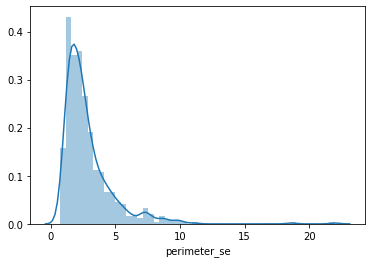

In [87]:
sns.distplot(df.perimeter_se)

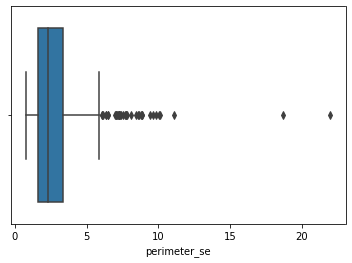

In [88]:
sns.boxplot(df.perimeter_se)

In [89]:
outliers('perimeter_se', df)

Upper bound:  5.983499999999999
Lower bound:  -1.0205000000000002


Number of outliers above upper bound:  38
Number of outliers below lower bound:  0
Percentage of outliers:  6.6784 %


In [90]:
df['perimeter_se'][df['perimeter_se']>5.983499999999999] = 5.983499999999999

In [91]:
outliers('perimeter_se', df)

Upper bound:  5.983499999999999
Lower bound:  -1.0205000000000002


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### area_se

In [92]:
df.area_se.describe()

count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area_se, dtype: float64

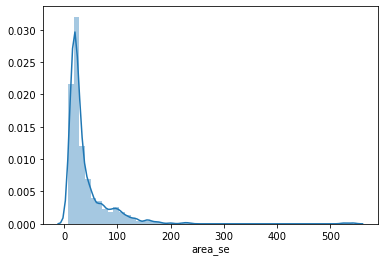

In [93]:
sns.distplot(df.area_se)

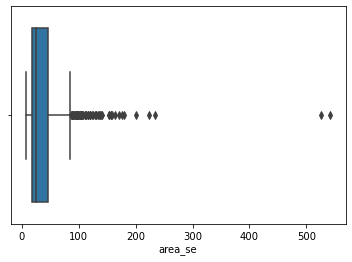

In [94]:
sns.boxplot(df.area_se)

In [95]:
outliers('area_se', df)

Upper bound:  86.19999999999999
Lower bound:  -23.15999999999999


Number of outliers above upper bound:  65
Number of outliers below lower bound:  0
Percentage of outliers:  11.4236 %


In [96]:
df['area_se'][df['area_se']>86.19999999999999] = 86.19999999999999

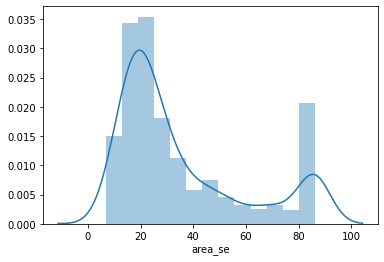

In [97]:
sns.distplot(df.area_se)

In [98]:
outliers('area_se', df)

Upper bound:  86.19999999999999
Lower bound:  -23.15999999999999


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### smoothness_se

In [99]:
df.smoothness_se.describe()

count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness_se, dtype: float64

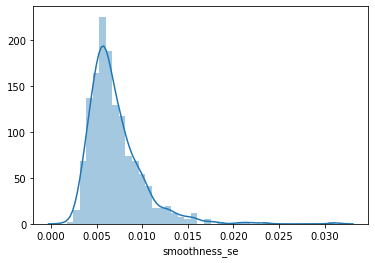

In [100]:
sns.distplot(df.smoothness_se)

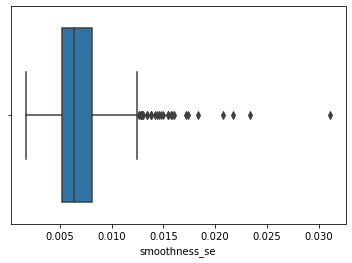

In [101]:
sns.boxplot(df.smoothness_se)

In [102]:
outliers('smoothness_se', df)

Upper bound:  0.012611499999999998
Lower bound:  0.0007035000000000019


Number of outliers above upper bound:  30
Number of outliers below lower bound:  0
Percentage of outliers:  5.2724 %


In [103]:
df['smoothness_se'][df['smoothness_se']>0.012611499999999998] = 0.012611499999999998

In [104]:
outliers('smoothness_se', df)

Upper bound:  0.012611499999999998
Lower bound:  0.0007035000000000019


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### compactness_se

In [105]:
df.compactness_se.describe()

count    569.000000
mean       0.025478
std        0.017908
min        0.002252
25%        0.013080
50%        0.020450
75%        0.032450
max        0.135400
Name: compactness_se, dtype: float64

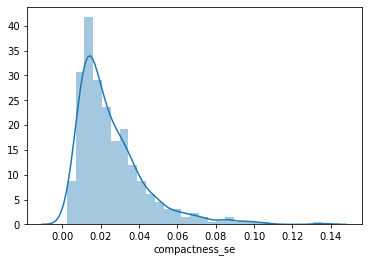

In [106]:
sns.distplot(df.compactness_se)

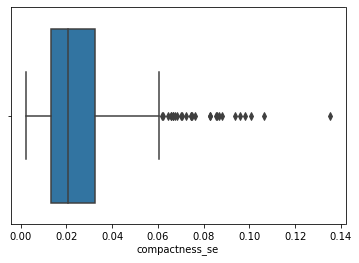

In [107]:
sns.boxplot(df.compactness_se)

In [108]:
outliers('compactness_se', df)

Upper bound:  0.061505
Lower bound:  -0.015974999999999996


Number of outliers above upper bound:  28
Number of outliers below lower bound:  0
Percentage of outliers:  4.9209 %


In [109]:
df['compactness_se'][df['compactness_se']>0.061505] = 0.061505

In [110]:
outliers('compactness_se', df)

Upper bound:  0.061505
Lower bound:  -0.015974999999999996


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### concavity_se

In [111]:
df.concavity_se.describe()

count    569.000000
mean       0.031894
std        0.030186
min        0.000000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.396000
Name: concavity_se, dtype: float64

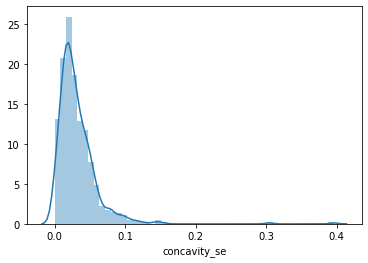

In [112]:
sns.distplot(df.concavity_se)

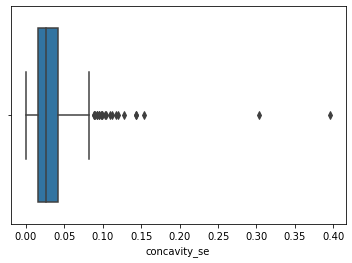

In [113]:
sns.boxplot(df.concavity_se)

In [114]:
outliers('concavity_se', df)

Upper bound:  0.08249
Lower bound:  -0.025349999999999998


Number of outliers above upper bound:  22
Number of outliers below lower bound:  0
Percentage of outliers:  3.8664 %


In [115]:
df['concavity_se'][df['concavity_se']>0.08249] = 0.08249

In [116]:
outliers('concavity_se', df)

Upper bound:  0.08249
Lower bound:  -0.025349999999999998


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### concave_points_se

In [117]:
df = df.rename({
    'concave points_se' : 'concave_points_se'
}, axis=1)

In [118]:
df.concave_points_se.describe()

count    569.000000
mean       0.011796
std        0.006170
min        0.000000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.052790
Name: concave_points_se, dtype: float64

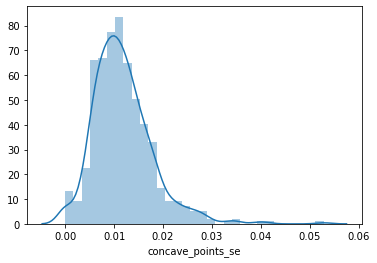

In [119]:
sns.distplot(df.concave_points_se)

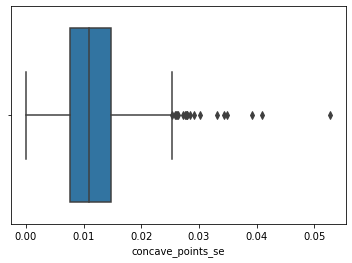

In [120]:
sns.boxplot(df.concave_points_se)

In [121]:
outliers('concave_points_se', df)

Upper bound:  0.025318
Lower bound:  -0.0029699999999999996


Number of outliers above upper bound:  19
Number of outliers below lower bound:  0
Percentage of outliers:  3.3392 %


In [122]:
df['concave_points_se'][df['concave_points_se']>0.025318] = 0.025318

In [123]:
outliers('concave_points_se', df)

Upper bound:  0.025318
Lower bound:  -0.0029699999999999996


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### symmetry_se

In [124]:
df.symmetry_se.describe()

count    569.000000
mean       0.020542
std        0.008266
min        0.007882
25%        0.015160
50%        0.018730
75%        0.023480
max        0.078950
Name: symmetry_se, dtype: float64

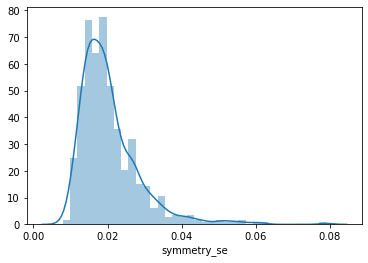

In [125]:
sns.distplot(df.symmetry_se)

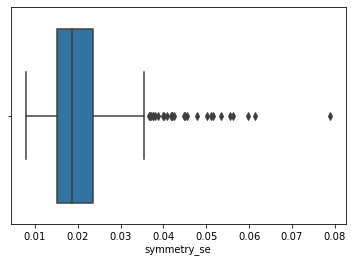

In [126]:
sns.boxplot(df.symmetry_se)

In [127]:
outliers('symmetry_se', df)

Upper bound:  0.035960000000000006
Lower bound:  0.0026799999999999984


Number of outliers above upper bound:  27
Number of outliers below lower bound:  0
Percentage of outliers:  4.7452 %


In [128]:
df['symmetry_se'][df['symmetry_se']>0.03596] = 0.03596

In [129]:
outliers('symmetry_se', df)

Upper bound:  0.035960000000000006
Lower bound:  0.0026799999999999984


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### fractal_dimension_se

In [130]:
df.fractal_dimension_se.describe()

count    569.000000
mean       0.003795
std        0.002646
min        0.000895
25%        0.002248
50%        0.003187
75%        0.004558
max        0.029840
Name: fractal_dimension_se, dtype: float64

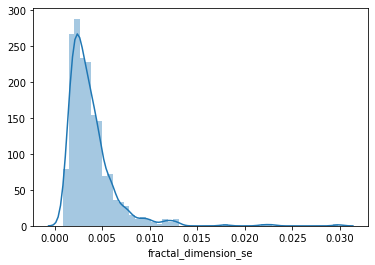

In [131]:
sns.distplot(df.fractal_dimension_se)

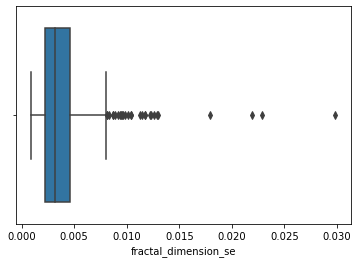

In [132]:
sns.boxplot(df.fractal_dimension_se)

In [133]:
outliers('fractal_dimension_se', df)

Upper bound:  0.008022999999999999
Lower bound:  -0.0012169999999999993


Number of outliers above upper bound:  28
Number of outliers below lower bound:  0
Percentage of outliers:  4.9209 %


In [134]:
df['fractal_dimension_se'][df['fractal_dimension_se']>0.008023] = 0.008023

In [135]:
outliers('fractal_dimension_se', df)

Upper bound:  0.008022999999999999
Lower bound:  -0.0012169999999999993


Number of outliers above upper bound:  28
Number of outliers below lower bound:  0
Percentage of outliers:  4.9209 %


#### radius_worst

In [136]:
df.radius_worst.describe()

count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Name: radius_worst, dtype: float64

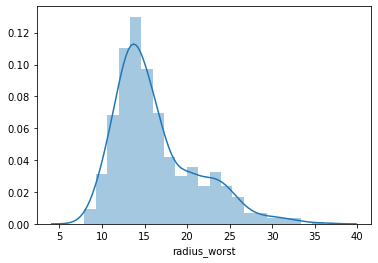

In [137]:
sns.distplot(df.radius_worst)

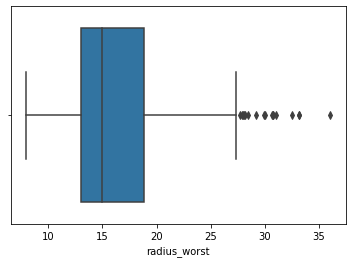

In [138]:
sns.boxplot(df.radius_worst)

In [139]:
outliers('radius_worst', df)

Upper bound:  27.459999999999997
Lower bound:  4.340000000000002


Number of outliers above upper bound:  17
Number of outliers below lower bound:  0
Percentage of outliers:  2.9877 %


In [140]:
df['radius_worst'][df['radius_worst']>27.459999999999997] = 27.459999999999997

In [141]:
outliers('radius_worst', df)

Upper bound:  27.459999999999997
Lower bound:  4.340000000000002


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### texture_worst

In [142]:
df.texture_worst.describe()

count    569.000000
mean      25.677223
std        6.146258
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       49.540000
Name: texture_worst, dtype: float64

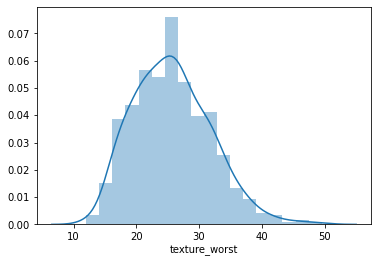

In [143]:
sns.distplot(df.texture_worst)

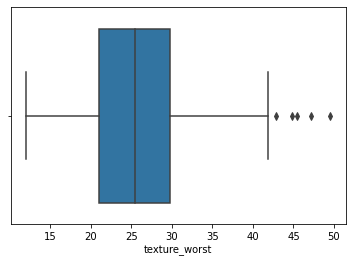

In [144]:
sns.boxplot(df.texture_worst)

In [145]:
outliers('texture_worst', df)

Upper bound:  42.68
Lower bound:  8.119999999999997


Number of outliers above upper bound:  5
Number of outliers below lower bound:  0
Percentage of outliers:  0.8787 %


In [146]:
df['texture_worst'][df['texture_worst']>42.68] = 42.68

In [147]:
outliers('texture_worst', df)

Upper bound:  42.68
Lower bound:  8.119999999999997


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### perimeter_worst

In [148]:
df.perimeter_worst.describe()

count    569.000000
mean     107.261213
std       33.602542
min       50.410000
25%       84.110000
50%       97.660000
75%      125.400000
max      251.200000
Name: perimeter_worst, dtype: float64

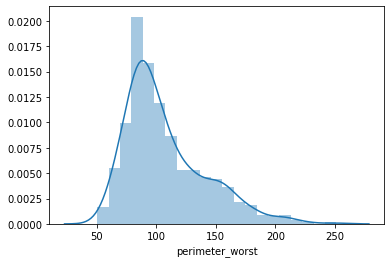

In [149]:
sns.distplot(df.perimeter_worst)

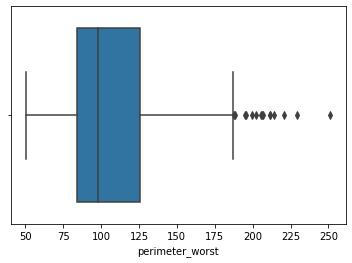

In [150]:
sns.boxplot(df.perimeter_worst)

In [151]:
outliers('perimeter_worst', df)

Upper bound:  187.335
Lower bound:  22.17499999999999


Number of outliers above upper bound:  15
Number of outliers below lower bound:  0
Percentage of outliers:  2.6362 %


In [152]:
df['perimeter_worst'][df['perimeter_worst']>187.335] = 187.335

In [153]:
outliers('perimeter_worst', df)

Upper bound:  187.335
Lower bound:  22.17499999999999


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### area_worst

In [154]:
df.area_worst.describe()

count     569.000000
mean      880.583128
std       569.356993
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      4254.000000
Name: area_worst, dtype: float64

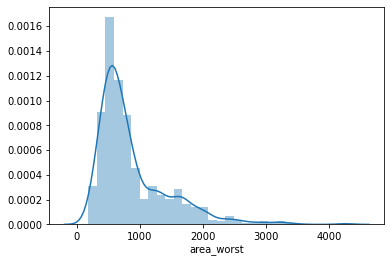

In [155]:
sns.distplot(df.area_worst)

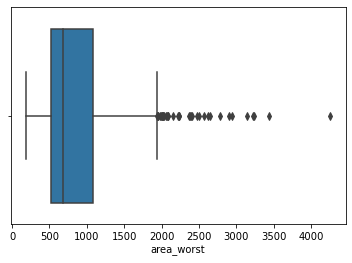

In [156]:
sns.boxplot(df.area_worst)

In [157]:
outliers('area_worst', df)

Upper bound:  1937.0500000000002
Lower bound:  -337.7500000000001


Number of outliers above upper bound:  35
Number of outliers below lower bound:  0
Percentage of outliers:  6.1511 %


In [158]:
df['area_worst'][df['area_worst']>1937.05] = 1937.05

In [159]:
outliers('area_worst', df)

Upper bound:  1937.0500000000002
Lower bound:  -337.7500000000001


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### smoothness_worst

In [160]:
df.smoothness_worst.describe()

count    569.000000
mean       0.132369
std        0.022832
min        0.071170
25%        0.116600
50%        0.131300
75%        0.146000
max        0.222600
Name: smoothness_worst, dtype: float64

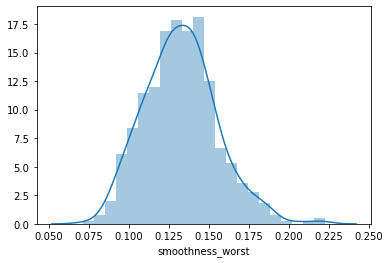

In [161]:
sns.distplot(df.smoothness_worst)

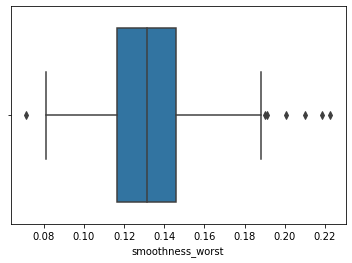

In [162]:
sns.boxplot(df.smoothness_worst)

In [163]:
outliers('smoothness_worst', df)

Upper bound:  0.1901
Lower bound:  0.07250000000000001


Number of outliers above upper bound:  6
Number of outliers below lower bound:  1
Percentage of outliers:  1.2302 %


In [164]:
df['smoothness_worst'][df['smoothness_worst']>0.1901] = 0.1901

df['smoothness_worst'][df['smoothness_worst']<0.07250000000000001] = 0.07250000000000001

In [165]:
outliers('smoothness_worst', df)

Upper bound:  0.1901
Lower bound:  0.07250000000000001


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### compactness_worst

In [166]:
df.compactness_worst.describe()

count    569.000000
mean       0.254265
std        0.157336
min        0.027290
25%        0.147200
50%        0.211900
75%        0.339100
max        1.058000
Name: compactness_worst, dtype: float64

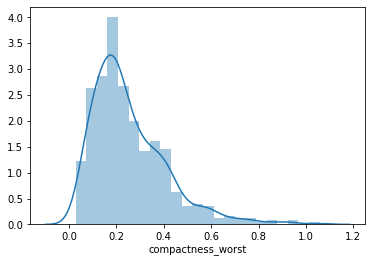

In [167]:
sns.distplot(df.compactness_worst)

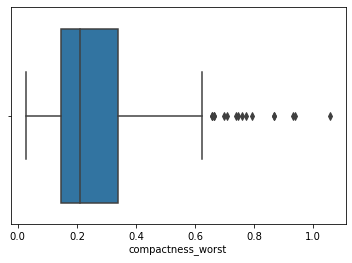

In [168]:
sns.boxplot(df.compactness_worst)

In [169]:
outliers('compactness_worst', df)

Upper bound:  0.6269500000000001
Lower bound:  -0.14065000000000005


Number of outliers above upper bound:  16
Number of outliers below lower bound:  0
Percentage of outliers:  2.812 %


In [170]:
df['compactness_worst'][df['compactness_worst']>0.6269500000000001] = 0.6269500000000001

In [171]:
outliers('compactness_worst', df)

Upper bound:  0.6269500000000001
Lower bound:  -0.14065000000000005


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### concavity_worst

In [172]:
df.concavity_worst.describe()

count    569.000000
mean       0.272188
std        0.208624
min        0.000000
25%        0.114500
50%        0.226700
75%        0.382900
max        1.252000
Name: concavity_worst, dtype: float64

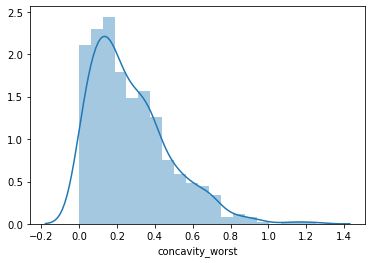

In [173]:
sns.distplot(df.concavity_worst)

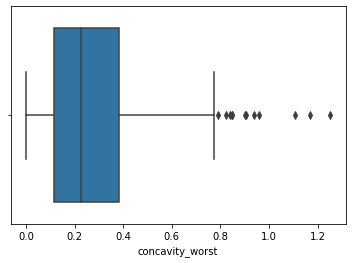

In [174]:
sns.boxplot(df.concavity_worst)

In [175]:
outliers('concavity_worst', df)

Upper bound:  0.7855000000000001
Lower bound:  -0.2881000000000001


Number of outliers above upper bound:  12
Number of outliers below lower bound:  0
Percentage of outliers:  2.109 %


In [176]:
df['concavity_worst'][df['concavity_worst']>0.7855000000000001] = 0.7855000000000001

In [177]:
outliers('concavity_worst', df)

Upper bound:  0.7855000000000001
Lower bound:  -0.2881000000000001


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### concave_points_worst

In [178]:
df = df.rename({
    'concave points_worst' : 'concave_points_worst'
},axis=1)

In [179]:
df.concave_points_worst.describe()

count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: concave_points_worst, dtype: float64

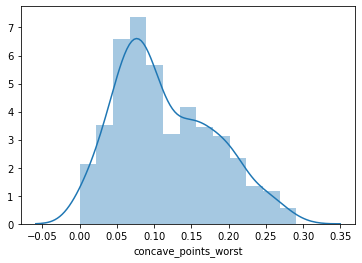

In [180]:
sns.distplot(df.concave_points_worst)

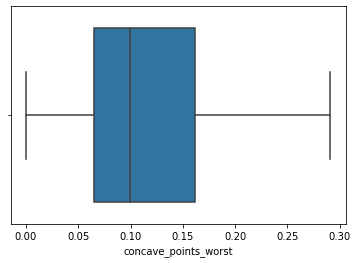

In [181]:
sns.boxplot(df.concave_points_worst)

In [182]:
outliers('concave_points_worst', df)

Upper bound:  0.30610499999999996
Lower bound:  -0.07977499999999997


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


#### symmetry_worst

In [183]:
df.symmetry_worst.describe()

count    569.000000
mean       0.290076
std        0.061867
min        0.156500
25%        0.250400
50%        0.282200
75%        0.317900
max        0.663800
Name: symmetry_worst, dtype: float64

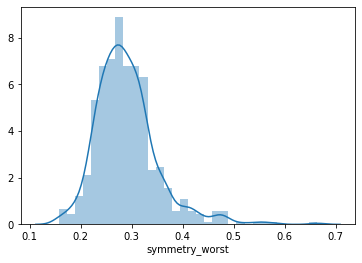

In [184]:
sns.distplot(df.symmetry_worst)

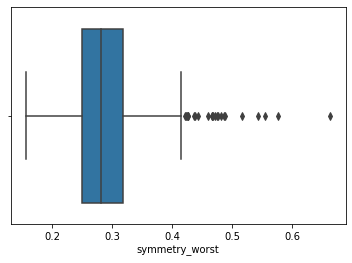

In [185]:
sns.boxplot(df.symmetry_worst)

In [186]:
outliers('symmetry_worst', df)

Upper bound:  0.41915
Lower bound:  0.14915


Number of outliers above upper bound:  23
Number of outliers below lower bound:  0
Percentage of outliers:  4.0422 %


In [187]:
df['symmetry_worst'][df['symmetry_worst']>0.41915] = 0.41915

In [188]:
outliers('symmetry_worst', df)

Upper bound:  0.41915
Lower bound:  0.14915


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


In [189]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### fractal_dimension_worst

In [190]:
df.fractal_dimension_worst.describe()

count    569.000000
mean       0.083946
std        0.018061
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.207500
Name: fractal_dimension_worst, dtype: float64

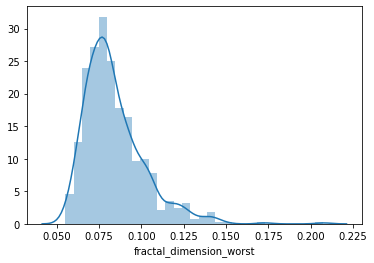

In [191]:
sns.distplot(df.fractal_dimension_worst)

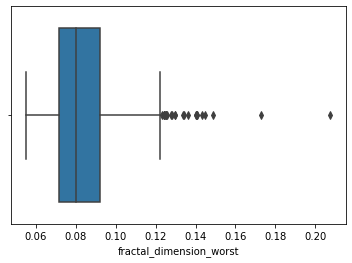

In [192]:
sns.boxplot(df.fractal_dimension_worst)

In [193]:
outliers('fractal_dimension_worst', df)

Upper bound:  0.12301
Lower bound:  0.04053


Number of outliers above upper bound:  24
Number of outliers below lower bound:  0
Percentage of outliers:  4.2179 %


In [194]:
df['fractal_dimension_worst'][df['fractal_dimension_worst']>0.12301] = 0.12301

In [195]:
outliers('fractal_dimension_worst', df)

Upper bound:  0.12301
Lower bound:  0.04053


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %


In [196]:
for col in df.columns:
    print(col)
    outliers(col, df)
    print('_________________________________')
    print('\n')

id
Upper bound:  20728995.5
Lower bound:  -11046648.5


Number of outliers above upper bound:  81
Number of outliers below lower bound:  0
Percentage of outliers:  14.2355 %
_________________________________


diagnosis
diagnosis is not a numeric variable
_________________________________


radius_mean
Upper bound:  21.9
Lower bound:  5.579999999999999


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %
_________________________________


texture_mean
Upper bound:  30.244999999999997
Lower bound:  7.725000000000003


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %
_________________________________


perimeter_mean
Upper bound:  147.49499999999998
Lower bound:  31.775000000000013


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0
Percentage of outliers:  0.0 %
_________________________________


area_mean
Upper bound:  1326.3000

In [197]:
# All the outliers are treated. now lets split the dataset into training and testing set.

# train test split

In [198]:
X = df.drop(['id','diagnosis'], axis=1)
y = df[['diagnosis']]

In [199]:
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0         0.118400   
1        20.57         17.77          132.90     1326.0         0.084740   
2        19.69         21.25          130.00     1203.0         0.109600   
3        11.42         20.38           77.58      386.1         0.133695   
4        20.29         14.34          135.10     1297.0         0.100300   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.22862         0.28241              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.22862         0.24140              0.10520         0.2464   
4           0.13280         0.19800              0.10430         0.1809   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
0                 0.07871    0.84865      0.9053        5.9835    86.20   
1                 0.05667    0.54350      0.7339        3.3980    74.08   
2                 0.05999    0.74560      0.7869        4.5850    86.20   
3                 0.07875    0.49560      1.1560        3.4450    27.23   
4                 0.05883    0.75720      0.7813        5.4380    86.20   

   smoothness_se  compactness_se  concavity_se  concave_points_se  \
0       0.006399        0.049040       0.05373            0.01587   
1       0.005225        0.013080       0.01860            0.01340   
2       0.006150        0.040060       0.03832            0.02058   
3       0.009110        0.061505       0.05661            0.01867   
4       0.011490        0.024610       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.03596              0.008023         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60     1937.05            0.1622            0.62695   
1           158.80     1937.05            0.1238            0.18660   
2           152.50     1709.00            0.1444            0.42450   
3            98.87      567.70            0.1901            0.62695   
4           152.20     1575.00            0.1374            0.20500   

   concavity_worst  concave_points_worst  symmetry_worst  \
0           0.7119                0.2654         0.41915   
1           0.2416                0.1860         0.27500   
2           0.4504                0.2430         0.36130   
3           0.6869                0.2575         0.41915   
4           0.4000                0.1625         0.23640   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.12301  
4                  0.07678

In [200]:
y.head()

diagnosis
0         M
1         M
2         M
3         M
4         M

In [201]:
X.shape

(569, 30)

In [202]:
y.shape

(569, 1)

In [203]:
X.ndim

2

In [204]:
y.ndim

2

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
X_train.shape

(455, 30)

In [207]:
y_train.shape

(455, 1)

In [208]:
X_test.shape

(114, 30)

In [209]:
y_test.shape

(114, 1)

# Exploratory Data Analysis (EDA)

In [210]:
Xy_train = pd.concat([X_train, y_train], axis=1)

Xy_test = pd.concat([X_test, y_test], axis=1)

In [211]:
Xy_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
68            0.14130         0.28241              0.04375         0.2111   
181           0.22862         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2464   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
68                  0.07875     0.3274      1.1940         1.885    17.67   
181                 0.07398     0.6298      0.7629         4.414    81.46   
63                  0.06963     0.4098      2.2650         2.608    23.52   
248                 0.06329     0.2497      1.4930         1.497    16.64   
60                  0.06960     0.5158      1.4410         3.312    34.62   

     smoothness_se  compactness_se  concavity_se  concave_points_se  \
68        0.009549        0.061505      0.082490           0.025318   
181       0.004253        0.047590      0.038720           0.015670   
63        0.008738        0.039380      0.043120           0.015600   
248       0.007189        0.010350      0.010810           0.006245   
60        0.007514        0.010990      0.007665           0.008193   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
68       0.03596              0.008023         10.31          22.65   
181      0.01798              0.005295         26.68          33.48   
63       0.03596              0.005822         10.01          19.23   
248      0.02158              0.002619         12.25          35.19   
60       0.03596              0.005953         11.02          17.45   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
68             65.50      324.70           0.14820            0.43650   
181           176.50     1937.05           0.14910            0.62695   
63             65.59      310.10           0.09836            0.16780   
248            77.98      455.70           0.14990            0.13980   
60             69.86      368.60           0.12750            0.09866   

     concavity_worst  concave_points_worst  symmetry_worst  \
68           0.78550               0.17500         0.41915   
181          0.67800               0.29030         0.40980   
63           0.13970               0.05087         0.32820   
248          0.11250               0.06136         0.34090   
60           0.02168               0.02579         0.35570   

     fractal_dimension_worst diagnosis  
68                   0.11750         B  
181                  0.12301         M  
63                   0.08490         B  
248                  0.08147         B  
60                   0.08020         B

In [212]:
Xy_test.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
204        12.47         18.60           81.09      481.9          0.09965   
70         18.94         21.31          123.60     1130.0          0.09009   
131        15.46         19.48          101.70      748.9          0.10920   
431        12.40         17.68           81.47      467.8          0.10540   
540        11.54         14.44           74.65      402.9          0.09984   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
204            0.1058         0.08005              0.03821         0.1925   
70             0.1029         0.10800              0.07951         0.1582   
131            0.1223         0.14660              0.08087         0.1931   
431            0.1316         0.07741              0.02799         0.1811   
540            0.1120         0.06737              0.02594         0.1818   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
204                 0.06373     0.3961      1.0440         2.497    30.29   
70                  0.05461     0.7888      0.7975         5.486    86.20   
131                 0.05796     0.4743      0.7859         3.094    48.31   
431                 0.07102     0.1767      1.4600         2.204    15.43   
540                 0.06782     0.2784      1.7680         1.628    20.86   

     smoothness_se  compactness_se  concavity_se  concave_points_se  \
204       0.006953         0.01911       0.02701            0.01037   
70        0.004444         0.01652       0.02269            0.01370   
131       0.006240         0.01484       0.02813            0.01093   
431       0.010000         0.03295       0.04861            0.01167   
540       0.012150         0.04112       0.05553            0.01494   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
204      0.01782              0.003586         14.97          24.64   
70       0.01386              0.001698         24.86          26.58   
131      0.01397              0.002461         19.26          26.00   
431      0.02187              0.006005         12.88          22.91   
540      0.01840              0.005512         12.26          19.68   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
204            96.05       677.9            0.1426             0.2378   
70            165.90      1866.0            0.1193             0.2336   
131           124.90      1156.0            0.1546             0.2394   
431            89.61       515.8            0.1450             0.2629   
540            78.78       457.8            0.1345             0.2118   

     concavity_worst  concave_points_worst  symmetry_worst  \
204           0.2671               0.10150          0.3014   
70            0.2687               0.17890          0.2551   
131           0.3791               0.15140          0.2837   
431           0.2403               0.07370          0.2556   
540           0.1797               0.06918          0.2329   

     fractal_dimension_worst diagnosis  
204                  0.08750         B  
70                   0.06589         M  
131                  0.08019         M  
431                  0.09359         B  
540                  0.08134         B

In [213]:
Xy_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 68 to 102
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              455 non-null    float64
 1   texture_mean             455 non-null    float64
 2   perimeter_mean           455 non-null    float64
 3   area_mean                455 non-null    float64
 4   smoothness_mean          455 non-null    float64
 5   compactness_mean         455 non-null    float64
 6   concavity_mean           455 non-null    float64
 7   concave_points_mean      455 non-null    float64
 8   symmetry_mean            455 non-null    float64
 9   fractal_dimension_mean   455 non-null    float64
 10  radius_se                455 non-null    float64
 11  texture_se               455 non-null    float64
 12  perimeter_se             455 non-null    float64
 13  area_se                  455 non-null    float64
 14  smoothness_se            

In [214]:
mean_var = Xy_train.columns[:10]
se_var = Xy_train.columns[10:20]
worst_var = Xy_train.columns[20:30]

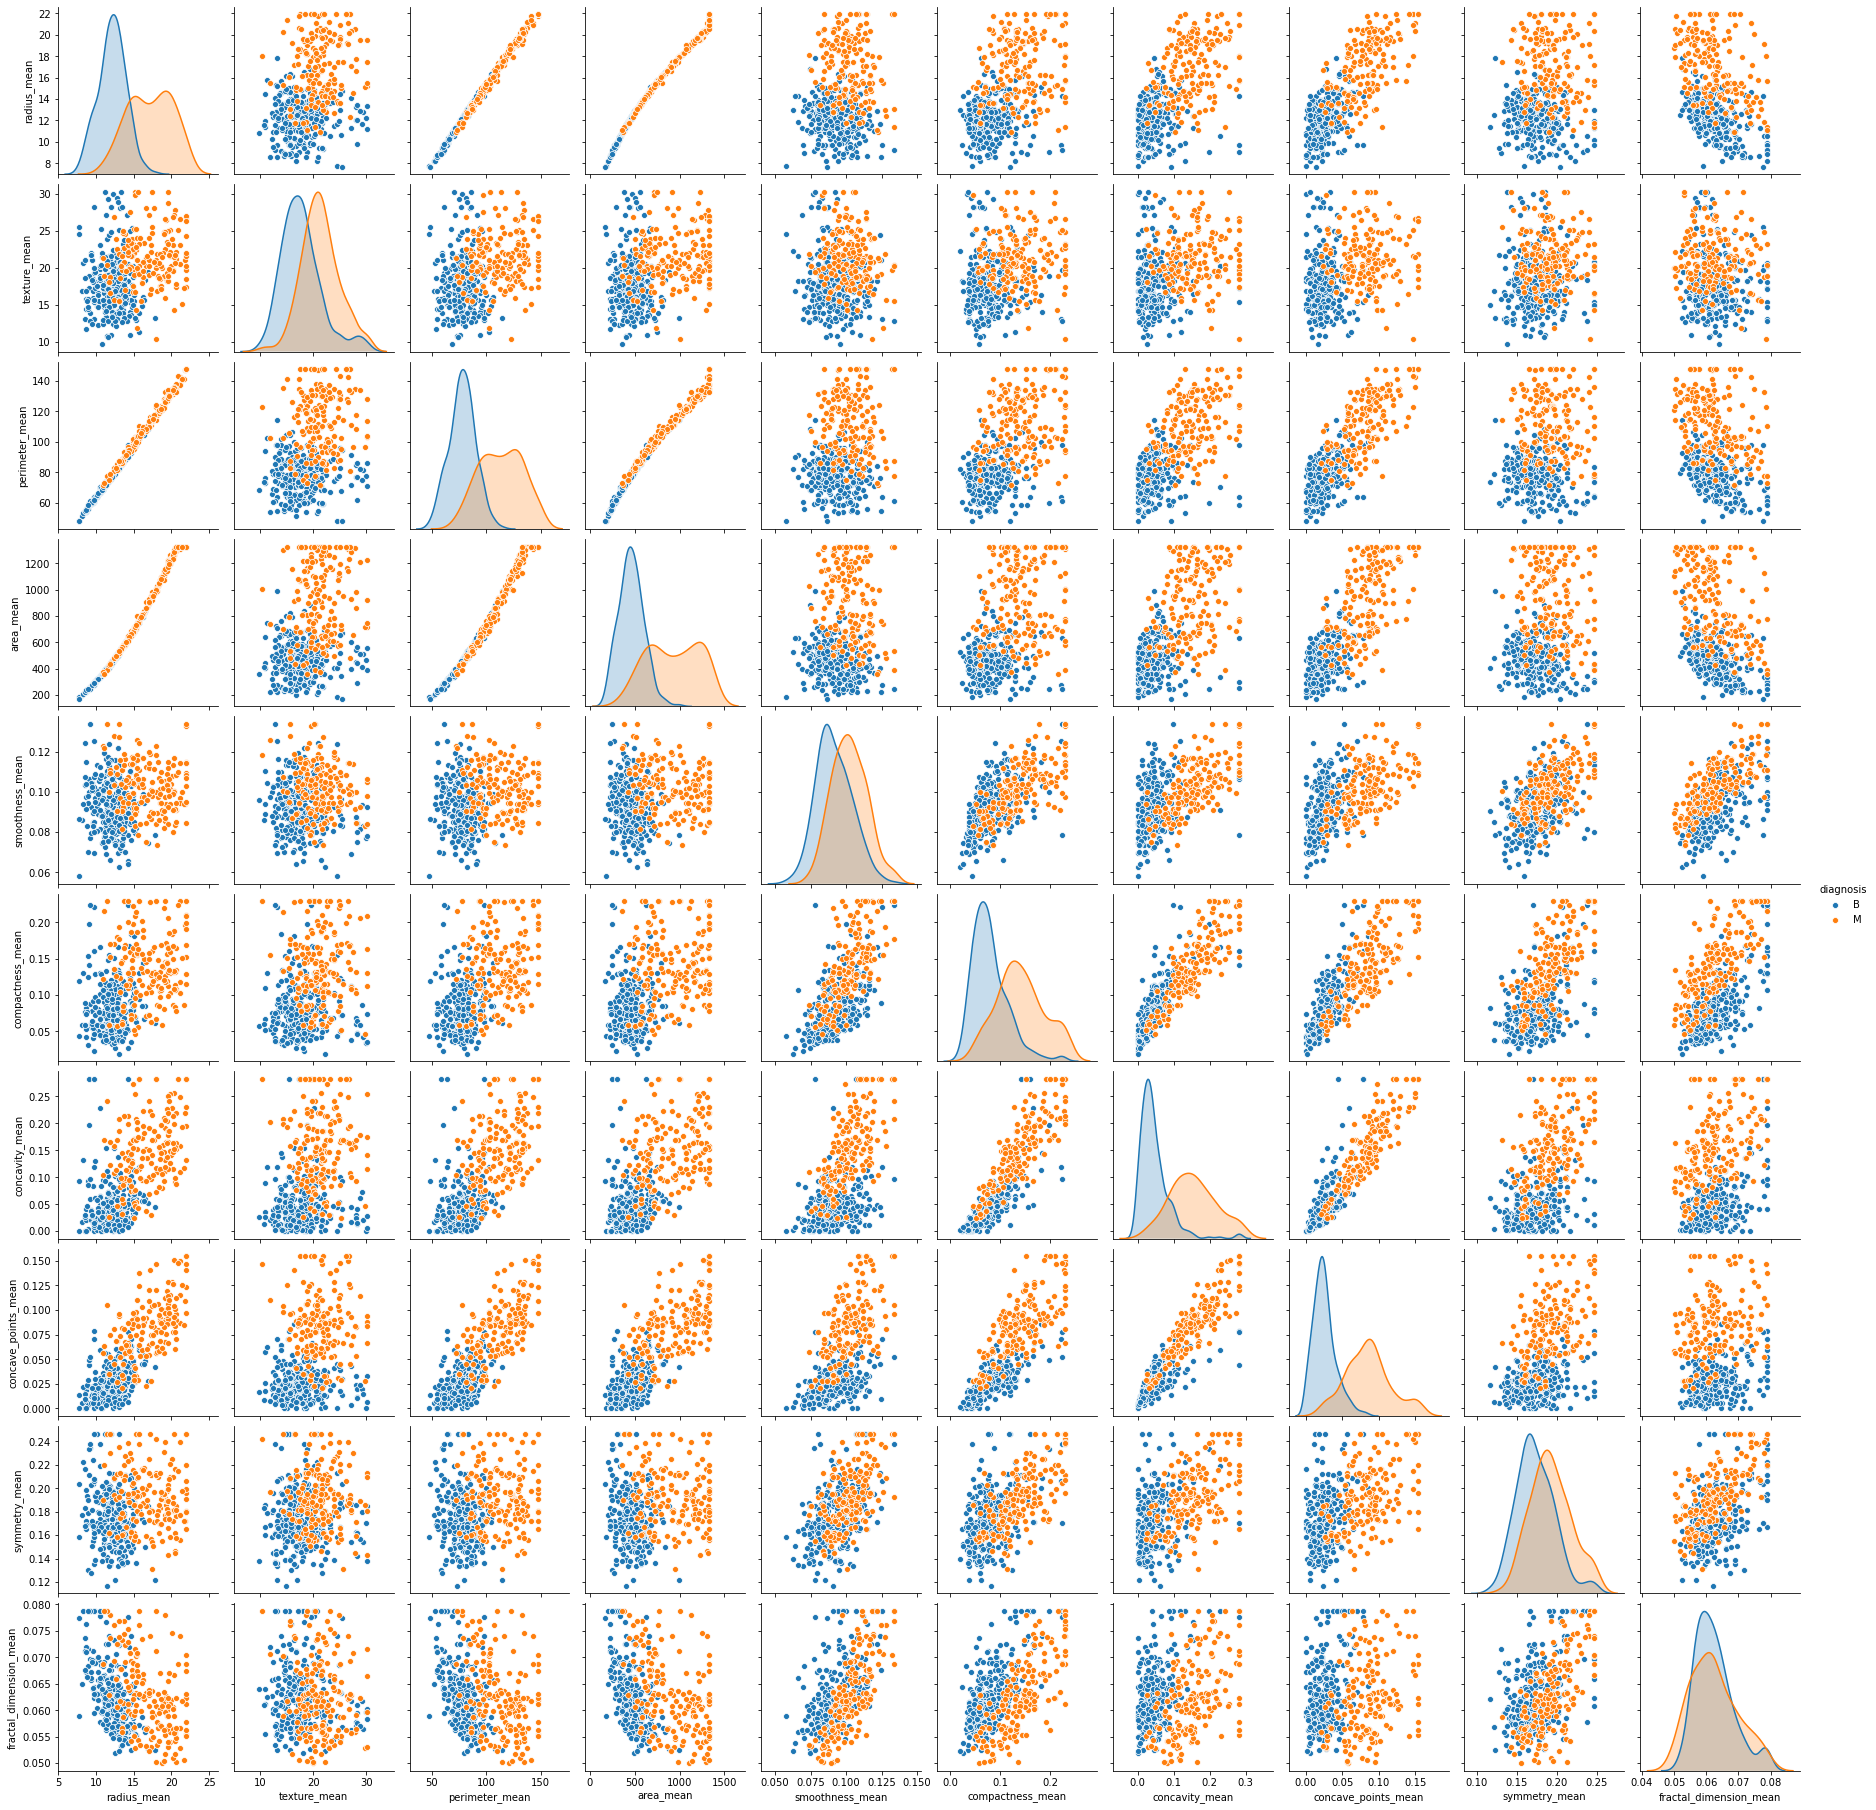

In [215]:
sns.pairplot(vars=mean_var.values, data=Xy_train, hue='diagnosis')

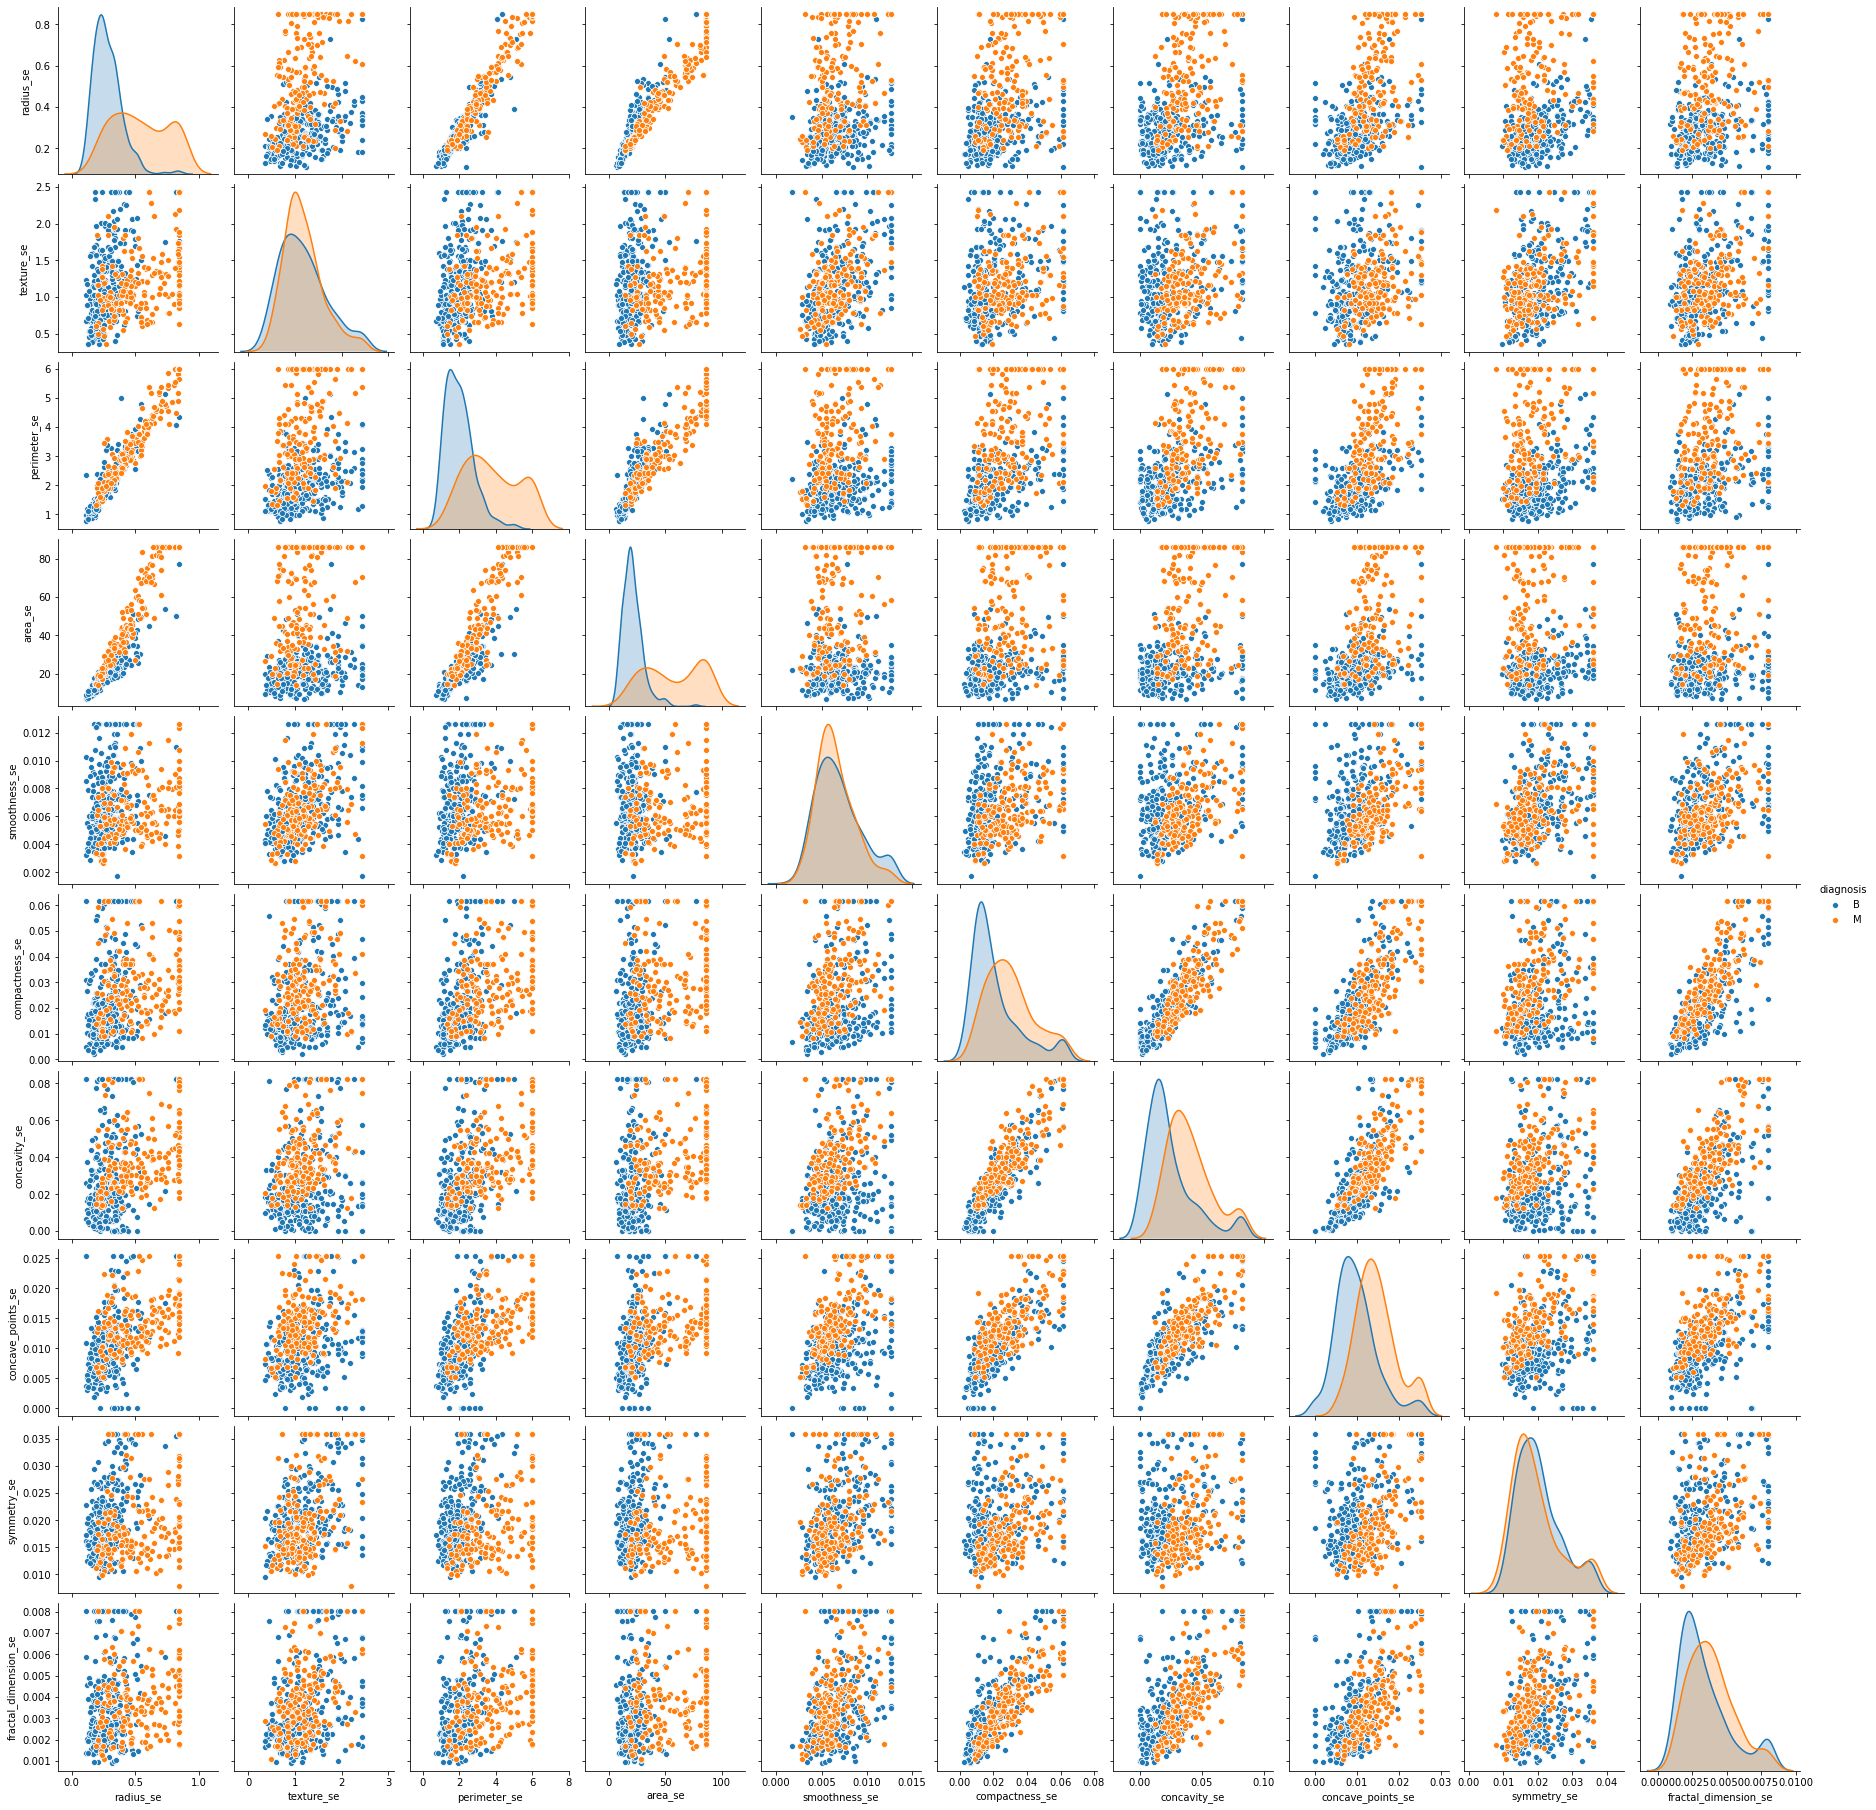

In [216]:
sns.pairplot(vars=se_var.values, data=Xy_train, hue='diagnosis')

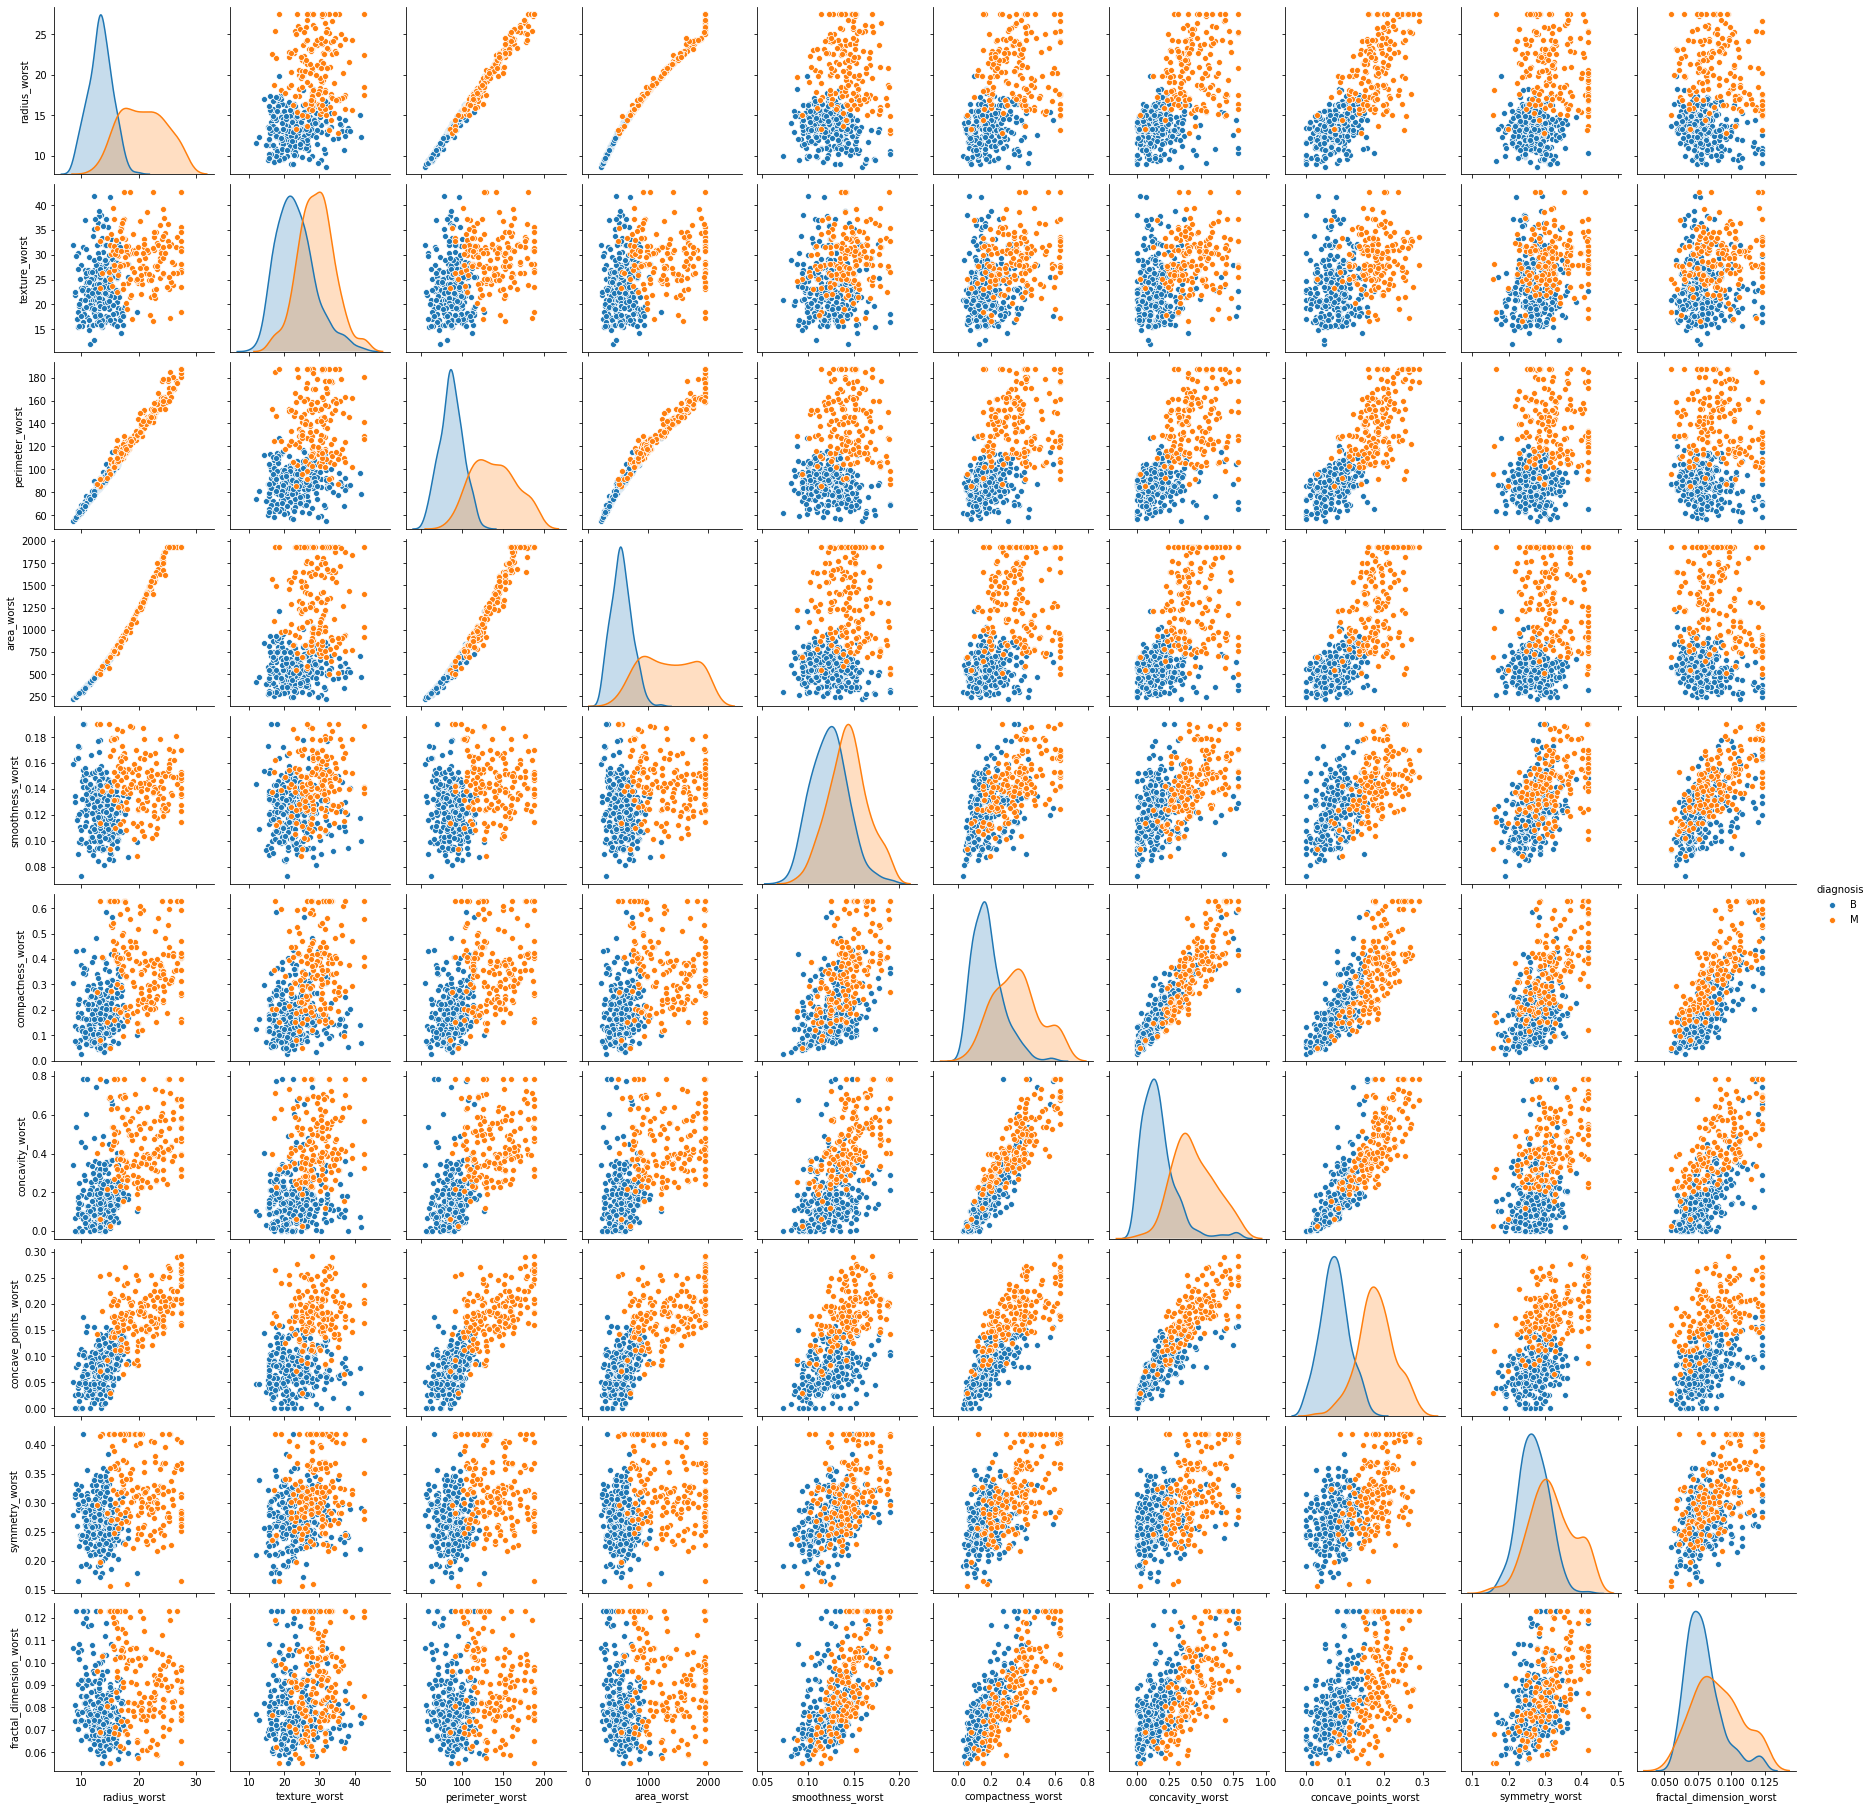

In [217]:
sns.pairplot(vars=worst_var.values, data=Xy_train, hue='diagnosis')

In [218]:
Xy_train.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.317029        0.997671   0.993785   
texture_mean                0.317029      1.000000        0.324895   0.321951   
perimeter_mean              0.997671      0.324895        1.000000   0.991571   
area_mean                   0.993785      0.321951        0.991571   1.000000   
smoothness_mean             0.167587      0.019887        0.205352   0.165904   
compactness_mean            0.474955      0.241315        0.528079   0.470544   
concavity_mean              0.642090      0.304029        0.684830   0.648471   
concave_points_mean         0.798623      0.296780        0.830521   0.800376   
symmetry_mean               0.151474      0.122910        0.187393   0.156117   
fractal_dimension_mean     -0.343211     -0.064452       -0.290970  -0.329305   
radius_se                   0.674972      0.304649        0.688212   0.702497   
texture_se                 -0.108550      0.392077       -0.097871  -0.085674   
perimeter_se                0.672918      0.320161        0.692655   0.696616   
area_se                     0.825751      0.333951        0.833530   0.850028   
smoothness_se              -0.266642      0.022801       -0.244912  -0.227712   
compactness_se              0.182692      0.210054        0.231430   0.189923   
concavity_se                0.285193      0.229762        0.328293   0.294840   
concave_points_se           0.384900      0.204040        0.420571   0.389730   
symmetry_se                -0.146830      0.002939       -0.128354  -0.127411   
fractal_dimension_se       -0.043674      0.095250        0.001763  -0.025808   
radius_worst                0.971894      0.338733        0.973491   0.972175   
texture_worst               0.299838      0.909055        0.307604   0.302870   
perimeter_worst             0.964933      0.349057        0.972174   0.964330   
area_worst                  0.960907      0.337821        0.962743   0.972104   
smoothness_worst            0.129177      0.095993        0.161382   0.137953   
compactness_worst           0.420267      0.277669        0.466824   0.410890   
concavity_worst             0.526563      0.293485        0.567002   0.524846   
concave_points_worst        0.726301      0.301992        0.757816   0.719179   
symmetry_worst              0.199523      0.134682        0.224281   0.194257   
fractal_dimension_worst    -0.004851      0.100159        0.043422  -0.000180   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.167587          0.474955        0.642090   
texture_mean                    0.019887          0.241315        0.304029   
perimeter_mean                  0.205352          0.528079        0.684830   
area_mean                       0.165904          0.470544        0.648471   
smoothness_mean                 1.000000          0.672490        0.542742   
compactness_mean                0.672490          1.000000        0.889657   
concavity_mean                  0.542742          0.889657        1.000000   
concave_points_mean             0.571513          0.828242        0.922537   
symmetry_mean                   0.538746          0.613747        0.515390   
fractal_dimension_mean          0.576875          0.563549        0.345150   
radius_se                       0.304861          0.509698        0.616886   
texture_se                      0.095310          0.064582        0.082686   
perimeter_se                    0.311366          0.573493        0.664675   
area_se                         0.273660          0.514955        0.658222   
smoothness_se                   0.331319          0.152015        0.105749   
compactness_se                  0.326244          0.768876        0.684251   
concavity_se                    0.316022          0.724941        0.763948   
concave_points_se               0.415493          0.708457        0.703119   
symmetry_se                    

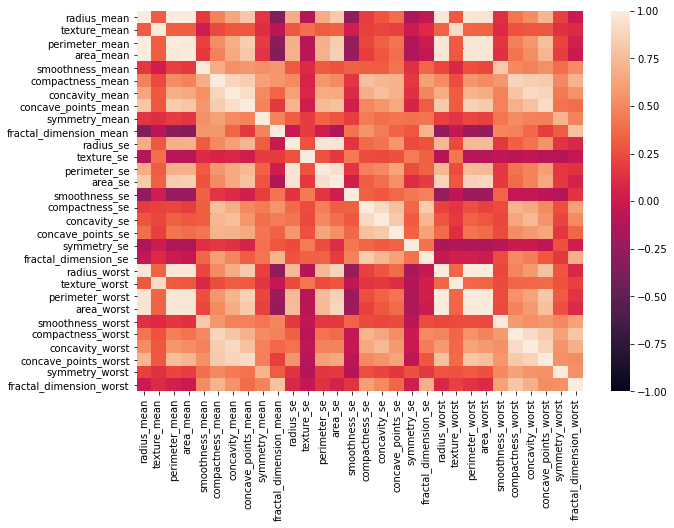

In [219]:
plt.figure(figsize=(10,7))
sns.heatmap(Xy_train.corr(), vmin=-1)

In [220]:
def analysis(x, data=Xy_train, y=None):
    from scipy.stats import ttest_ind
    
    if x != 'diagnosis':
        if y:
            print(f'Description of {x}: \n', data[x].describe(), '\n')
            print(f'Description of {y}: \n', data[y].describe(), '\n')

            sns.distplot(data[x])
            plt.title(f'Histogram of {x}')
            plt.show()

            sns.distplot(data[y])
            plt.title(f'Histogram of {y}')
            plt.show()

            sns.scatterplot(x, y, data=data, hue='diagnosis')
            plt.title(f'Scatterplot between {x} and {y}')
            plt.show()

        else:
            print(f'Description of {x}: \n', data[x].describe(), '\n')

            sns.distplot(data[x])
            plt.title(f'Histogram of {x}')
            plt.show()

            sns.scatterplot(x, 'diagnosis', data=data, hue='diagnosis')
            plt.title(f'Scatterplot between {x} and diagnosis')
            plt.show()

            sns.boxplot(data['diagnosis'], data[x])
            plt.title(f'Boxplot of {x} and diagnosis')
            plt.show()

            print(f'Relationship between {x} and {y}\n')

            Ho = f'There is no significant impact of {x} on diagnosis (No predictability)'
            Ha = f'There is a significant impact of {x} on diagnosis (Good predictor)'
            print('Ho: ', Ho)
            print('Ha: ', Ha)
            print('\n')

            alpha = 0.05

            ind1 = data[data['diagnosis']=='M']
            ind2 = data[data['diagnosis']=='B']

            stat, p = ttest_ind(ind1[x], ind2[x])
            print('Test Statistics: ', stat)
            print('p-value: ', p, '\n')

            if p>alpha:
                print('Fail to reject Ho, ', Ho)
            else:
                print('Reject Ho, ', Ha)
                
    else:
        print(f'Description of {x}: \n', data[x].describe(), '\n')
        
        print('Value counts: \n', data[x].value_counts())
        
        sns.countplot(data[x])

In [221]:
action = {}

#### diagnosis

Description of diagnosis: 
 count     455
unique      2
top         B
freq      286
Name: diagnosis, dtype: object 

Value counts: 
 B    286
M    169
Name: diagnosis, dtype: int64


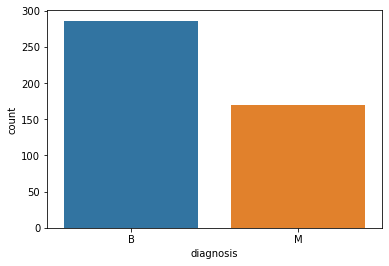

In [222]:
analysis('diagnosis', data=Xy_train)

In [223]:
# There are less samples for malignent tumor than benign tumor

#### radius_mean

Description of radius_mean: 
 count    455.000000
mean      14.047284
std        3.332588
min        7.691000
25%       11.705000
50%       13.300000
75%       15.740000
max       21.900000
Name: radius_mean, dtype: float64 



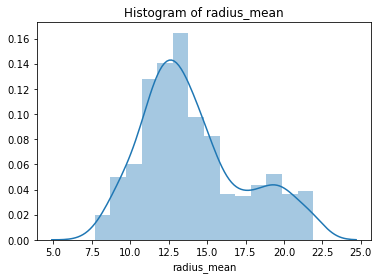

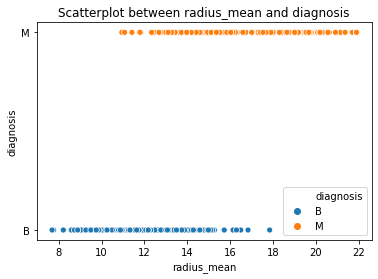

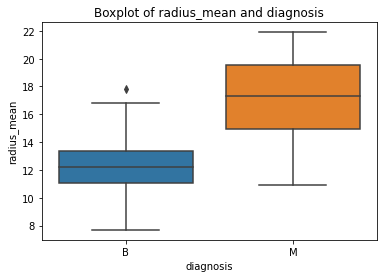

Relationship between radius_mean and None

Ho:  There is no significant impact of radius_mean on diagnosis (No predictability)
Ha:  There is a significant impact of radius_mean on diagnosis (Good predictor)


Test Statistics:  23.027942476454285
p-value:  2.9591464131683043e-78 

Reject Ho,  There is a significant impact of radius_mean on diagnosis (Good predictor)


In [224]:
analysis('radius_mean', data=Xy_train)

In [225]:
# The average radius_mean for malignent tumor is higher than benign tumor.
# if the radius_mean is around 14 and above, then the tumor is classified as malignent

In [226]:
# radius_mean can be a good predictor

#### texture_mean

Description of texture_mean: 
 count    455.000000
mean      19.143297
std        4.126511
min        9.710000
25%       16.170000
50%       18.680000
75%       21.585000
max       30.245000
Name: texture_mean, dtype: float64 



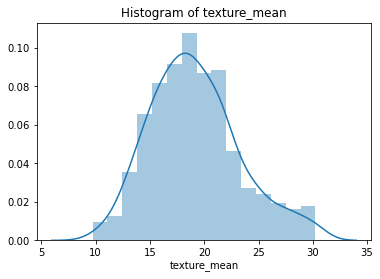

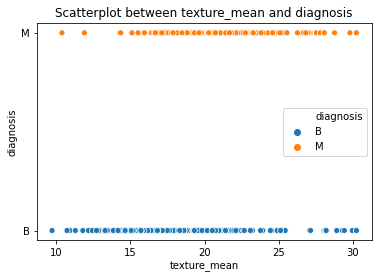

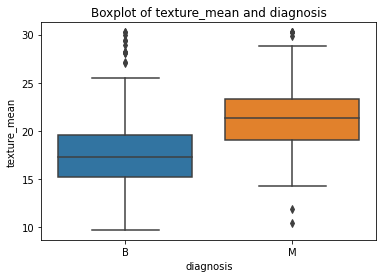

Relationship between texture_mean and None

Ho:  There is no significant impact of texture_mean on diagnosis (No predictability)
Ha:  There is a significant impact of texture_mean on diagnosis (Good predictor)


Test Statistics:  9.894833561880747
p-value:  4.969947679670779e-21 

Reject Ho,  There is a significant impact of texture_mean on diagnosis (Good predictor)


In [227]:
analysis('texture_mean', data=Xy_train)

In [228]:
# As the texture_mean increases, the chance that the tumor is malignent, increses.

In [229]:
# texture_mean can be a good predictor

#### perimeter_mean

Description of perimeter_mean: 
 count    455.000000
mean      91.413330
std       22.927098
min       47.920000
25%       75.100000
50%       85.980000
75%      103.750000
max      147.495000
Name: perimeter_mean, dtype: float64 



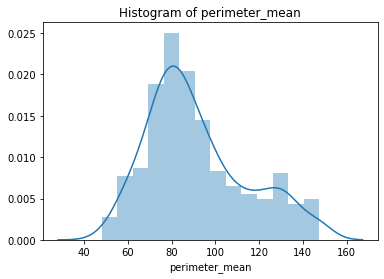

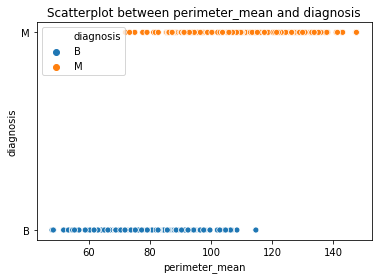

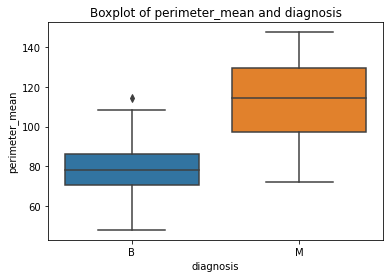

Relationship between perimeter_mean and None

Ho:  There is no significant impact of perimeter_mean on diagnosis (No predictability)
Ha:  There is a significant impact of perimeter_mean on diagnosis (Good predictor)


Test Statistics:  24.115278744835113
p-value:  2.9063090232157014e-83 

Reject Ho,  There is a significant impact of perimeter_mean on diagnosis (Good predictor)


In [230]:
analysis('perimeter_mean', data=Xy_train)

In [231]:
# As the perimeter_mean increases, the chance of the tumor being malignent increases.

In [232]:
# perimeter_mean can be a good predcitor

#### area_mean

Description of area_mean: 
 count     455.000000
mean      638.600440
std       304.994356
min       170.400000
25%       420.300000
50%       551.700000
75%       767.600000
max      1326.300000
Name: area_mean, dtype: float64 



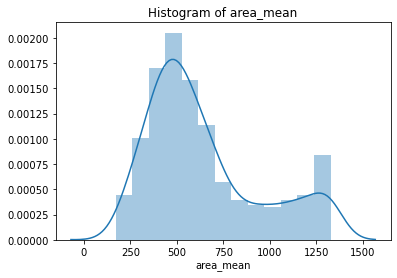

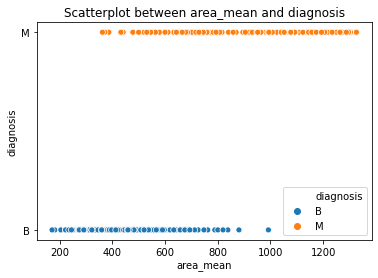

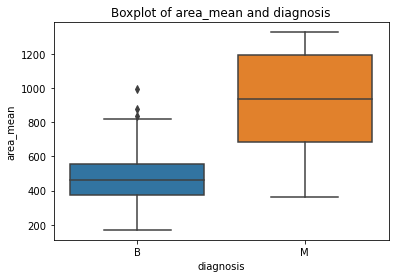

Relationship between area_mean and None

Ho:  There is no significant impact of area_mean on diagnosis (No predictability)
Ha:  There is a significant impact of area_mean on diagnosis (Good predictor)


Test Statistics:  23.532302616555842
p-value:  1.3972808452018483e-80 

Reject Ho,  There is a significant impact of area_mean on diagnosis (Good predictor)


In [233]:
analysis('area_mean', data=Xy_train)

In [234]:
# If the area_mean is higher, the chance that a tumor is malignent increases.

In [235]:
# area_mean can be a good predictor

#### smoothness_mean

Description of smoothness_mean: 
 count    455.000000
mean       0.095634
std        0.013458
min        0.057975
25%        0.085825
50%        0.094620
75%        0.104550
max        0.133695
Name: smoothness_mean, dtype: float64 



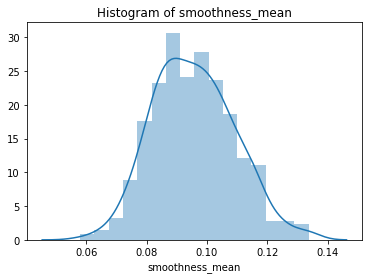

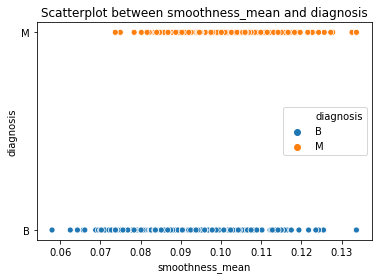

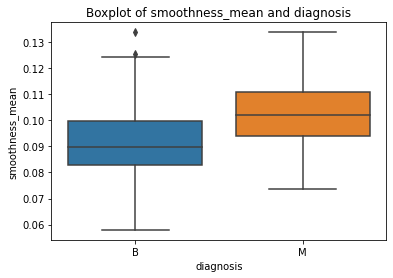

Relationship between smoothness_mean and None

Ho:  There is no significant impact of smoothness_mean on diagnosis (No predictability)
Ha:  There is a significant impact of smoothness_mean on diagnosis (Good predictor)


Test Statistics:  8.896052423147642
p-value:  1.391829878917929e-17 

Reject Ho,  There is a significant impact of smoothness_mean on diagnosis (Good predictor)


In [236]:
analysis('smoothness_mean', data=Xy_train)

In [237]:
# If the smoothness_mean is higher, the chance that a tumor is malignent increases.

In [238]:
# smoothness_mean can be a good predictor

#### compactness_mean

Description of compactness_mean: 
 count    455.00000
mean       0.10269
std        0.04970
min        0.01938
25%        0.06289
50%        0.09097
75%        0.13130
max        0.22862
Name: compactness_mean, dtype: float64 



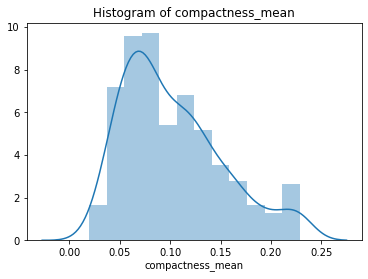

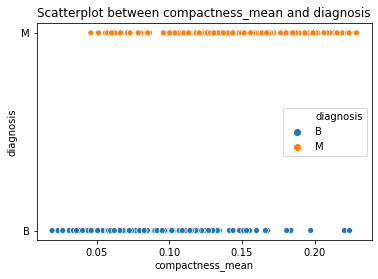

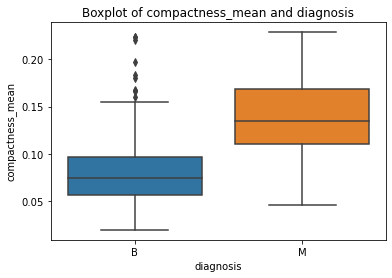

Relationship between compactness_mean and None

Ho:  There is no significant impact of compactness_mean on diagnosis (No predictability)
Ha:  There is a significant impact of compactness_mean on diagnosis (Good predictor)


Test Statistics:  15.926309552901142
p-value:  1.1383464617153722e-45 

Reject Ho,  There is a significant impact of compactness_mean on diagnosis (Good predictor)


In [239]:
analysis('compactness_mean', data=Xy_train)

In [240]:
# If the compactness_mean is higher, the chance that a tumor being malignent increases.

In [241]:
# compactness_mean can be a good predictor

#### concavity_mean

Description of concavity_mean: 
 count    455.000000
mean       0.087038
std        0.073589
min        0.000000
25%        0.029320
50%        0.061540
75%        0.132350
max        0.282410
Name: concavity_mean, dtype: float64 



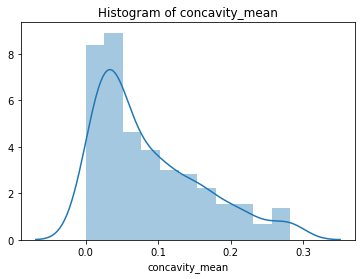

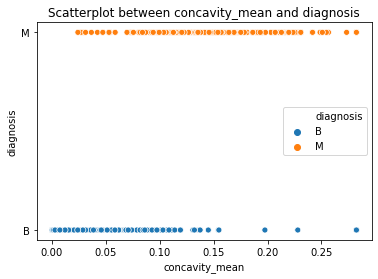

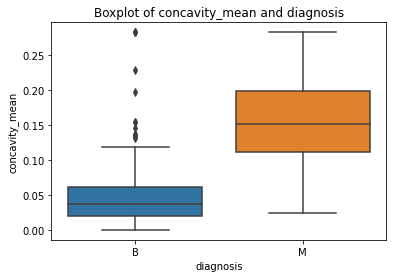

Relationship between concavity_mean and None

Ho:  There is no significant impact of concavity_mean on diagnosis (No predictability)
Ha:  There is a significant impact of concavity_mean on diagnosis (Good predictor)


Test Statistics:  21.821456472690905
p-value:  1.1219320896595828e-72 

Reject Ho,  There is a significant impact of concavity_mean on diagnosis (Good predictor)


In [242]:
analysis('concavity_mean', data=Xy_train)

In [243]:
# If the concavity_mean is higher, the chance that a tumor being malignent increases.

In [244]:
# concavity_mean can be a good predictor

#### concave_points_mean

Description of concave_points_mean: 
 count    455.000000
mean       0.047903
std        0.036820
min        0.000000
25%        0.020340
50%        0.033410
75%        0.073895
max        0.154535
Name: concave_points_mean, dtype: float64 



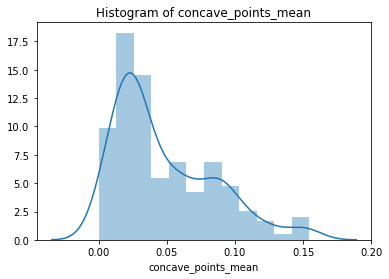

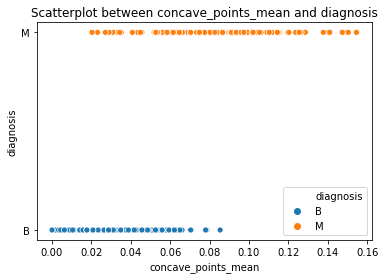

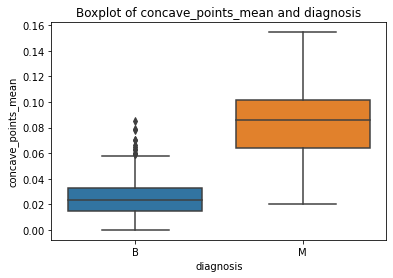

Relationship between concave_points_mean and None

Ho:  There is no significant impact of concave_points_mean on diagnosis (No predictability)
Ha:  There is a significant impact of concave_points_mean on diagnosis (Good predictor)


Test Statistics:  27.517659885138258
p-value:  1.0285976872826265e-98 

Reject Ho,  There is a significant impact of concave_points_mean on diagnosis (Good predictor)


In [245]:
analysis('concave_points_mean', data=Xy_train)

In [246]:
# If the concave_points_mean is higher, the chance that a tumor being malignent increases.

In [247]:
# concave_points_mean can be a good predictor

#### symmetry_mean

Description of symmetry_mean: 
 count    455.000000
mean       0.180666
std        0.026198
min        0.116700
25%        0.161850
50%        0.179200
75%        0.195800
max        0.246400
Name: symmetry_mean, dtype: float64 



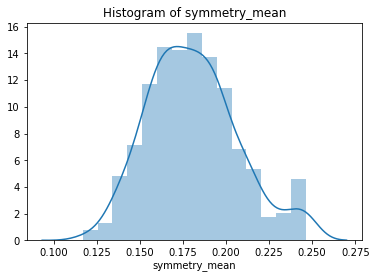

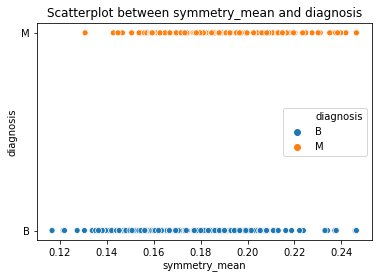

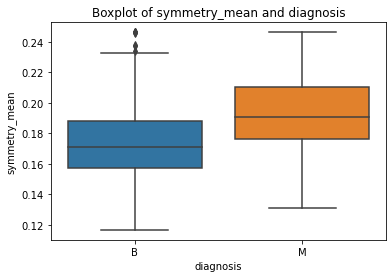

Relationship between symmetry_mean and None

Ho:  There is no significant impact of symmetry_mean on diagnosis (No predictability)
Ha:  There is a significant impact of symmetry_mean on diagnosis (Good predictor)


Test Statistics:  8.047184339441264
p-value:  7.504234240051198e-15 

Reject Ho,  There is a significant impact of symmetry_mean on diagnosis (Good predictor)


In [248]:
analysis('symmetry_mean', data=Xy_train)

In [249]:
# If the symmetry_mean is higher, the chance that a tumor being malignent increases.

In [250]:
# symmetry_mean can be a good predictor

#### fractal_dimension_mean

Description of fractal_dimension_mean: 
 count    455.000000
mean       0.062529
std        0.006451
min        0.049960
25%        0.057645
50%        0.061480
75%        0.066100
max        0.078750
Name: fractal_dimension_mean, dtype: float64 



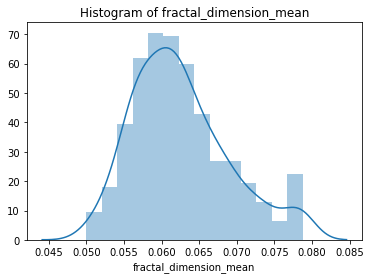

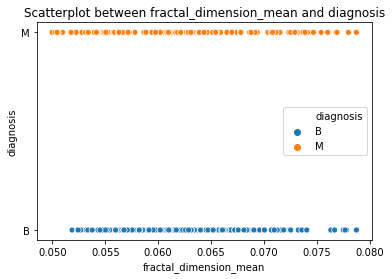

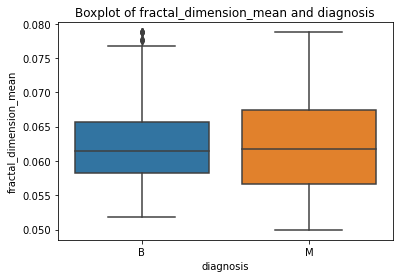

Relationship between fractal_dimension_mean and None

Ho:  There is no significant impact of fractal_dimension_mean on diagnosis (No predictability)
Ha:  There is a significant impact of fractal_dimension_mean on diagnosis (Good predictor)


Test Statistics:  -0.0882544897800786
p-value:  0.9297134106775775 

Fail to reject Ho,  There is no significant impact of fractal_dimension_mean on diagnosis (No predictability)


In [251]:
analysis('fractal_dimension_mean', data=Xy_train)

In [252]:
# fractal_dimension_mean is not a good predictor

action['drop'] = ['fractal_dimension_mean']

#### radius_se

Description of radius_se: 
 count    455.000000
mean       0.380262
std        0.200625
min        0.111500
25%        0.234800
50%        0.323700
75%        0.467750
max        0.848650
Name: radius_se, dtype: float64 



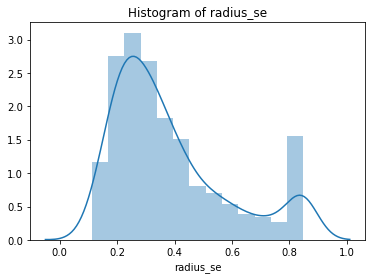

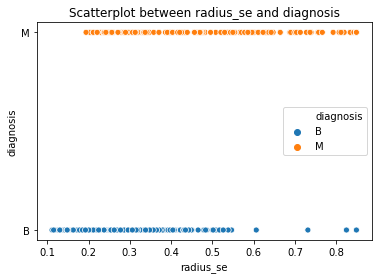

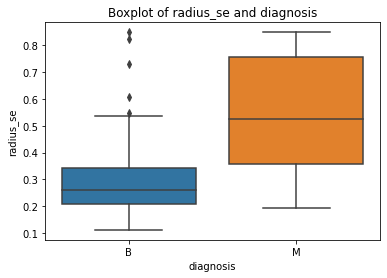

Relationship between radius_se and None

Ho:  There is no significant impact of radius_se on diagnosis (No predictability)
Ha:  There is a significant impact of radius_se on diagnosis (Good predictor)


Test Statistics:  16.900795758161664
p-value:  4.842620396053845e-50 

Reject Ho,  There is a significant impact of radius_se on diagnosis (Good predictor)


In [253]:
analysis('radius_se', data=Xy_train)

In [254]:
# If the radius_se is higher, the chance that a tumor being malignent increases.

In [255]:
# radius_se can be a good predictor

#### texture_se

Description of texture_se: 
 count    455.000000
mean       1.185028
std        0.476847
min        0.360200
25%        0.834700
50%        1.095000
75%        1.439500
max        2.434150
Name: texture_se, dtype: float64 



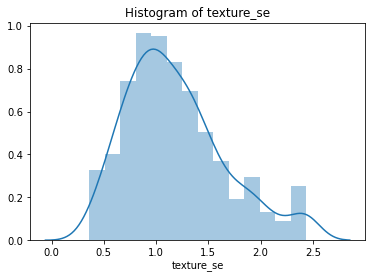

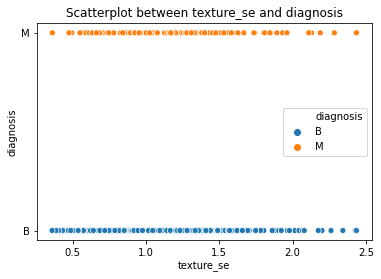

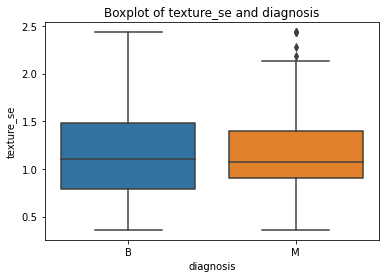

Relationship between texture_se and None

Ho:  There is no significant impact of texture_se on diagnosis (No predictability)
Ha:  There is a significant impact of texture_se on diagnosis (Good predictor)


Test Statistics:  0.07299899925841603
p-value:  0.9418391341326496 

Fail to reject Ho,  There is no significant impact of texture_se on diagnosis (No predictability)


In [256]:
analysis('texture_se', data=Xy_train)

In [257]:
# texture_se is not a good predictor

action['drop'].append('texture_se')

#### perimeter_se

Description of perimeter_se: 
 count    455.000000
mean       2.679023
std        1.375329
min        0.757000
25%        1.653000
50%        2.287000
75%        3.270500
max        5.983500
Name: perimeter_se, dtype: float64 



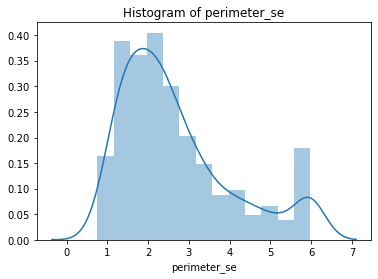

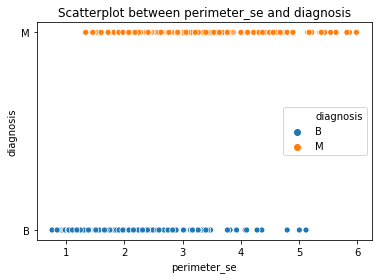

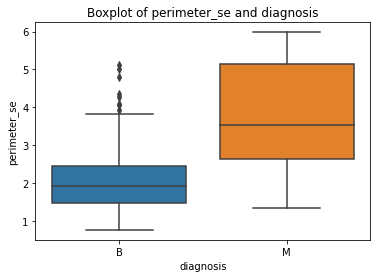

Relationship between perimeter_se and None

Ho:  There is no significant impact of perimeter_se on diagnosis (No predictability)
Ha:  There is a significant impact of perimeter_se on diagnosis (Good predictor)


Test Statistics:  17.142228922959067
p-value:  3.9159063160364996e-51 

Reject Ho,  There is a significant impact of perimeter_se on diagnosis (Good predictor)


In [258]:
analysis('perimeter_se', data=Xy_train)

In [259]:
# If the perimeter_se is higher, the chance that a tumor being malignent increases.

In [260]:
# perimeter_se can be a good predictor

#### area_se

Description of area_se: 
 count    455.000000
mean      34.572552
std       24.040065
min        6.802000
25%       18.170000
50%       24.720000
75%       43.725000
max       86.200000
Name: area_se, dtype: float64 



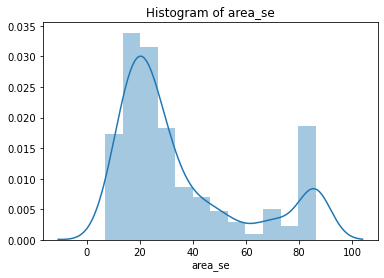

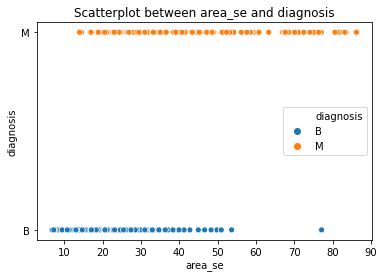

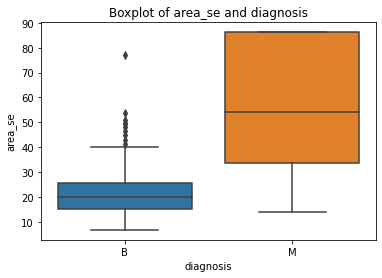

Relationship between area_se and None

Ho:  There is no significant impact of area_se on diagnosis (No predictability)
Ha:  There is a significant impact of area_se on diagnosis (Good predictor)


Test Statistics:  21.961209712286795
p-value:  2.5292250914898334e-73 

Reject Ho,  There is a significant impact of area_se on diagnosis (Good predictor)


In [261]:
analysis('area_se', data=Xy_train)

In [262]:
# If the area_se is higher, the chance that a tumor being malignent increases.

In [263]:
# area_se can be a good predictor

#### smoothness_se

Description of smoothness_se: 
 count    455.000000
mean       0.006802
std        0.002357
min        0.001713
25%        0.005076
50%        0.006380
75%        0.008069
max        0.012611
Name: smoothness_se, dtype: float64 



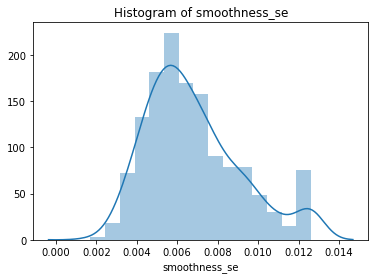

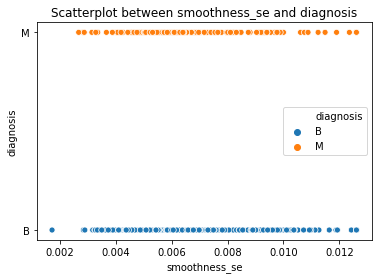

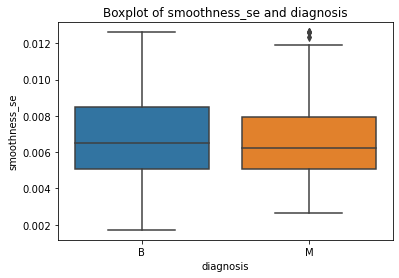

Relationship between smoothness_se and None

Ho:  There is no significant impact of smoothness_se on diagnosis (No predictability)
Ha:  There is a significant impact of smoothness_se on diagnosis (Good predictor)


Test Statistics:  -1.5417272781474127
p-value:  0.12383811343465709 

Fail to reject Ho,  There is no significant impact of smoothness_se on diagnosis (No predictability)


In [264]:
analysis('smoothness_se', data=Xy_train)

In [265]:
# smoothness_se is not a good predictor

action['drop'].append('smoothness_se')

#### compactness_se

Description of compactness_se: 
 count    455.000000
mean       0.024546
std        0.015146
min        0.002252
25%        0.012730
50%        0.020420
75%        0.032295
max        0.061505
Name: compactness_se, dtype: float64 



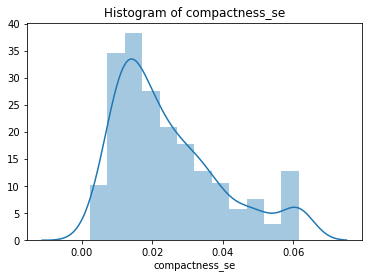

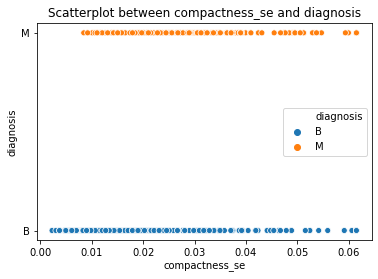

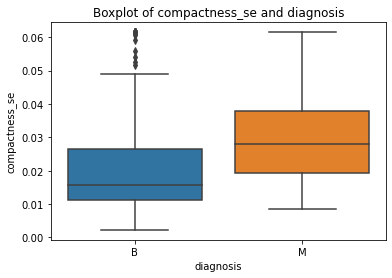

Relationship between compactness_se and None

Ho:  There is no significant impact of compactness_se on diagnosis (No predictability)
Ha:  There is a significant impact of compactness_se on diagnosis (Good predictor)


Test Statistics:  6.5360467158838205
p-value:  1.7043909984792838e-10 

Reject Ho,  There is a significant impact of compactness_se on diagnosis (Good predictor)


In [266]:
analysis('compactness_se', data=Xy_train)

In [267]:
# If the compactness_se is higher, the chance that a tumor being malignent increases.

In [268]:
# compactness_se can be a good predictor

#### concavity_se

Description of concavity_se: 
 count    455.000000
mean       0.030590
std        0.020910
min        0.000000
25%        0.015120
50%        0.026150
75%        0.042565
max        0.082490
Name: concavity_se, dtype: float64 



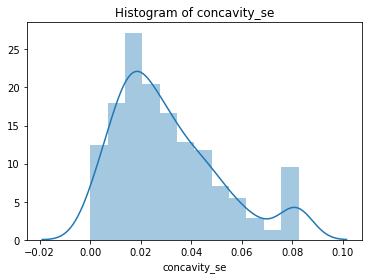

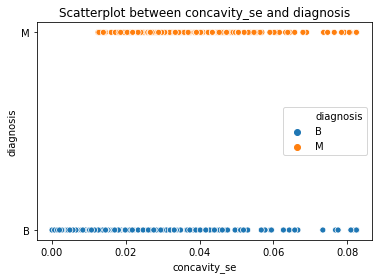

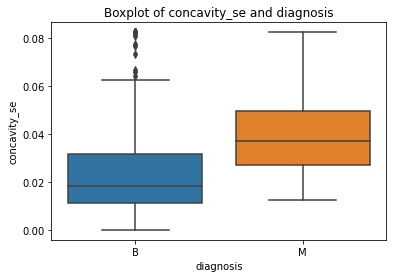

Relationship between concavity_se and None

Ho:  There is no significant impact of concavity_se on diagnosis (No predictability)
Ha:  There is a significant impact of concavity_se on diagnosis (Good predictor)


Test Statistics:  8.454232846301208
p-value:  3.884553862848866e-16 

Reject Ho,  There is a significant impact of concavity_se on diagnosis (Good predictor)


In [269]:
analysis('concavity_se', data=Xy_train)

In [270]:
# If the concavity_se is higher, the chance that a tumor being malignent increases.

In [271]:
# concavity_se can be a good predictor

#### concave_points_se

Description of concave_points_se: 
 count    455.000000
mean       0.011659
std        0.005471
min        0.000000
25%        0.007691
50%        0.011100
75%        0.014645
max        0.025318
Name: concave_points_se, dtype: float64 



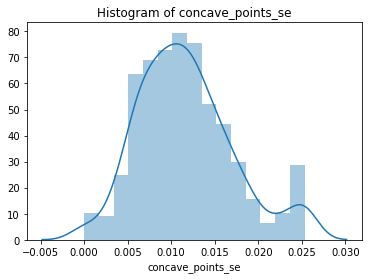

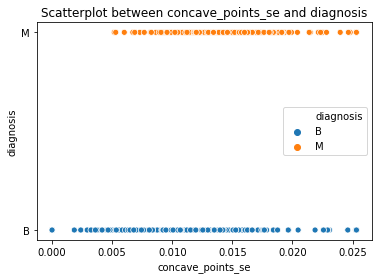

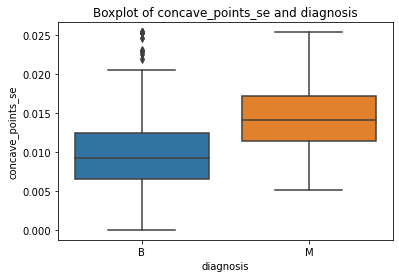

Relationship between concave_points_se and None

Ho:  There is no significant impact of concave_points_se on diagnosis (No predictability)
Ha:  There is a significant impact of concave_points_se on diagnosis (Good predictor)


Test Statistics:  10.011924586861591
p-value:  1.8920802555099907e-21 

Reject Ho,  There is a significant impact of concave_points_se on diagnosis (Good predictor)


In [272]:
analysis('concave_points_se', data=Xy_train)

In [273]:
# If the concave_points_mean is higher, the chance that a tumor being malignent increases.

In [274]:
# concave_points_mean can be a good predictor

#### symmetry_se

Description of symmetry_se: 
 count    455.000000
mean       0.020081
std        0.006602
min        0.007882
25%        0.015210
50%        0.018720
75%        0.023220
max        0.035960
Name: symmetry_se, dtype: float64 



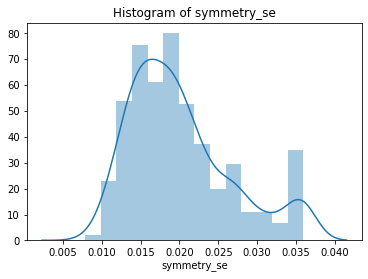

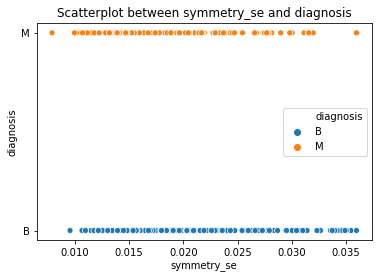

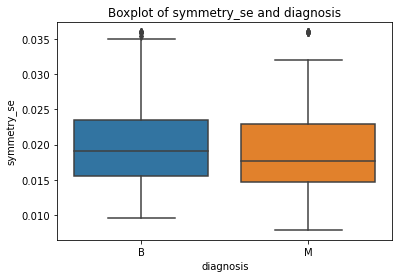

Relationship between symmetry_se and None

Ho:  There is no significant impact of symmetry_se on diagnosis (No predictability)
Ha:  There is a significant impact of symmetry_se on diagnosis (Good predictor)


Test Statistics:  -1.1314776287363748
p-value:  0.25845273557151327 

Fail to reject Ho,  There is no significant impact of symmetry_se on diagnosis (No predictability)


In [275]:
analysis('symmetry_se', data=Xy_train)

In [276]:
# symmetry_se is not a good predictor

action['drop'].append('symmetry_se')

#### fractal_dimension_se

Description of fractal_dimension_se: 
 count    455.000000
mean       0.003587
std        0.001793
min        0.000895
25%        0.002223
50%        0.003211
75%        0.004504
max        0.008023
Name: fractal_dimension_se, dtype: float64 



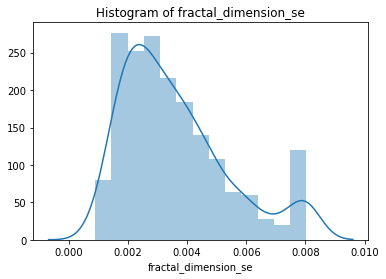

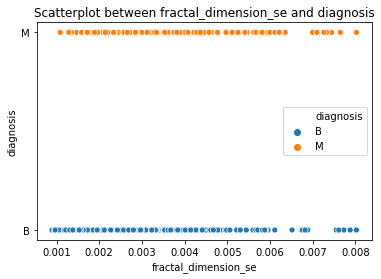

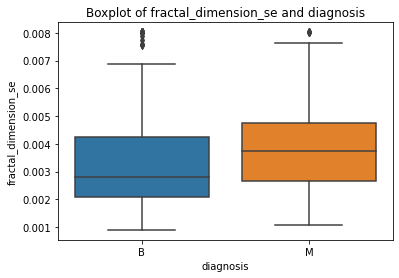

Relationship between fractal_dimension_se and None

Ho:  There is no significant impact of fractal_dimension_se on diagnosis (No predictability)
Ha:  There is a significant impact of fractal_dimension_se on diagnosis (Good predictor)


Test Statistics:  2.6585568856781765
p-value:  0.008125394313634701 

Reject Ho,  There is a significant impact of fractal_dimension_se on diagnosis (Good predictor)


In [277]:
analysis('fractal_dimension_se', data=Xy_train)

#### radius_worst

Description of radius_worst: 
 count    455.000000
mean      16.152818
std        4.570274
min        8.678000
25%       13.055000
50%       14.970000
75%       18.410000
max       27.460000
Name: radius_worst, dtype: float64 



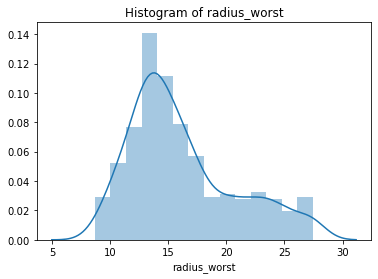

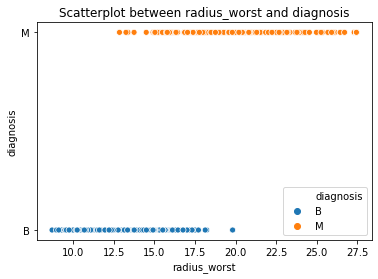

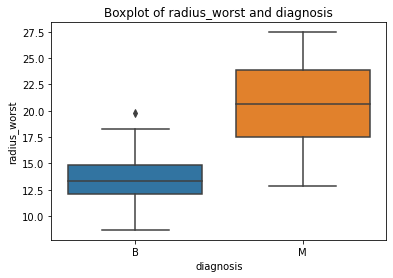

Relationship between radius_worst and None

Ho:  There is no significant impact of radius_worst on diagnosis (No predictability)
Ha:  There is a significant impact of radius_worst on diagnosis (Good predictor)


Test Statistics:  26.836173928765
p-value:  1.1861639511557366e-95 

Reject Ho,  There is a significant impact of radius_worst on diagnosis (Good predictor)


In [278]:
analysis('radius_worst', data=Xy_train)

In [279]:
# If the radius_worst is higher, the chance that a tumor being malignent increases.

In [280]:
# radius_worst can be a good predictor

#### texture_worst

Description of texture_worst: 
 count    455.000000
mean      25.509560
std        5.979648
min       12.020000
25%       21.045000
50%       25.220000
75%       29.690000
max       42.680000
Name: texture_worst, dtype: float64 



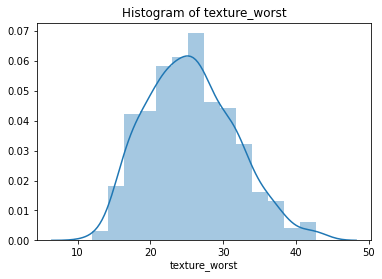

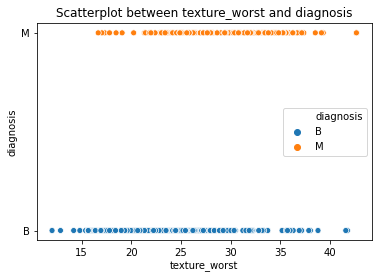

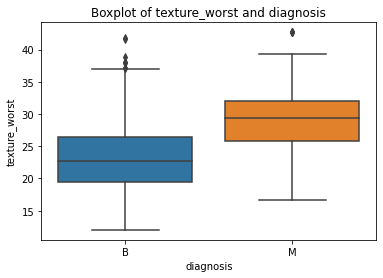

Relationship between texture_worst and None

Ho:  There is no significant impact of texture_worst on diagnosis (No predictability)
Ha:  There is a significant impact of texture_worst on diagnosis (Good predictor)


Test Statistics:  11.285828738119664
p-value:  3.36295752574589e-26 

Reject Ho,  There is a significant impact of texture_worst on diagnosis (Good predictor)


In [281]:
analysis('texture_worst', data=Xy_train)

In [282]:
# If the texture_worst is higher, the chance that a tumor being malignent increases.

In [283]:
# texture_worst can be a good predictor

#### perimeter_worst

Description of perimeter_worst: 
 count    455.000000
mean     106.590121
std       31.818851
min       54.490000
25%       84.255000
50%       97.670000
75%      124.650000
max      187.335000
Name: perimeter_worst, dtype: float64 



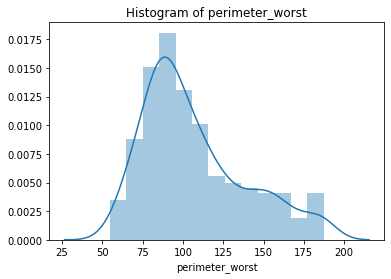

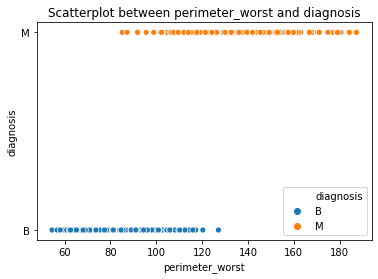

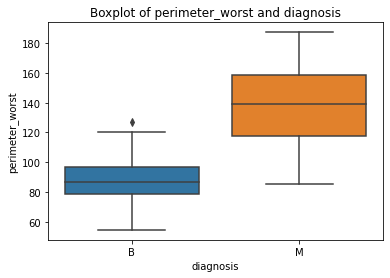

Relationship between perimeter_worst and None

Ho:  There is no significant impact of perimeter_worst on diagnosis (No predictability)
Ha:  There is a significant impact of perimeter_worst on diagnosis (Good predictor)


Test Statistics:  27.60070345196114
p-value:  4.369397641851834e-99 

Reject Ho,  There is a significant impact of perimeter_worst on diagnosis (Good predictor)


In [284]:
analysis('perimeter_worst', data=Xy_train)

In [285]:
# If the perimeter_worst is higher, the chance that a tumor being malignent increases.

In [286]:
# perimeter_worst can be a good predictor

#### area_worst

Description of area_worst: 
 count     455.000000
mean      846.453846
std       473.233726
min       223.600000
25%       516.450000
50%       686.600000
75%      1031.500000
max      1937.050000
Name: area_worst, dtype: float64 



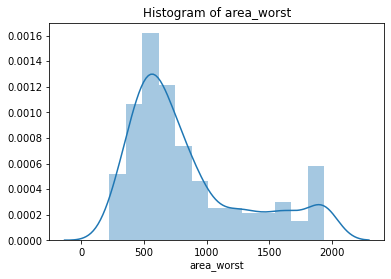

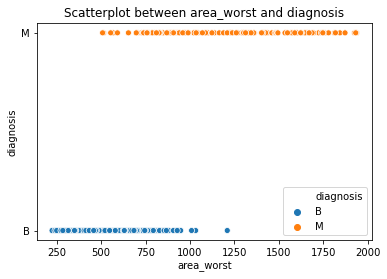

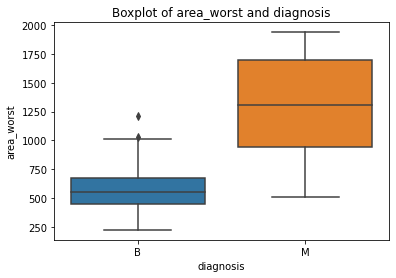

Relationship between area_worst and None

Ho:  There is no significant impact of area_worst on diagnosis (No predictability)
Ha:  There is a significant impact of area_worst on diagnosis (Good predictor)


Test Statistics:  26.80148451836188
p-value:  1.7001797866834372e-95 

Reject Ho,  There is a significant impact of area_worst on diagnosis (Good predictor)


In [287]:
analysis('area_worst', data=Xy_train)

In [288]:
# If the area_worst is higher, the chance that a tumor being malignent increases.

In [289]:
# area_worst can be a good predictor

#### smoothness_worst

Description of smoothness_worst: 
 count    455.000000
mean       0.131405
std        0.022677
min        0.072500
25%        0.114400
50%        0.130900
75%        0.146050
max        0.190100
Name: smoothness_worst, dtype: float64 



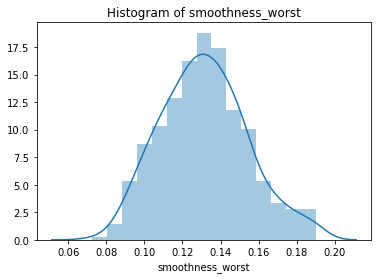

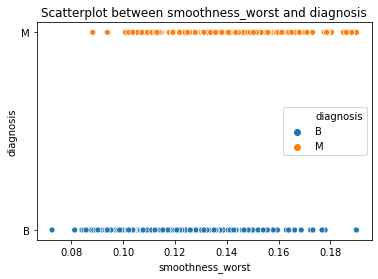

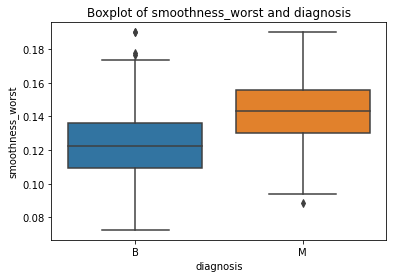

Relationship between smoothness_worst and None

Ho:  There is no significant impact of smoothness_worst on diagnosis (No predictability)
Ha:  There is a significant impact of smoothness_worst on diagnosis (Good predictor)


Test Statistics:  10.212152541000192
p-value:  3.570294404667703e-22 

Reject Ho,  There is a significant impact of smoothness_worst on diagnosis (Good predictor)


In [290]:
analysis('smoothness_worst', data=Xy_train)

In [291]:
# If the smoothness_worst is higher, the chance that a tumor being malignent increases.

In [292]:
# smoothness_worst can be a good predictor

#### compactness_worst

Description of compactness_worst: 
 count    455.000000
mean       0.248986
std        0.142972
min        0.027290
25%        0.144950
50%        0.210100
75%        0.341600
max        0.626950
Name: compactness_worst, dtype: float64 



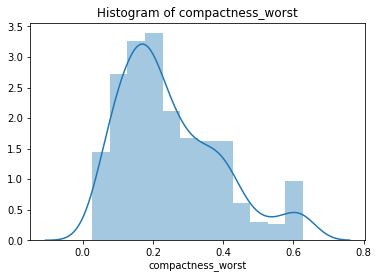

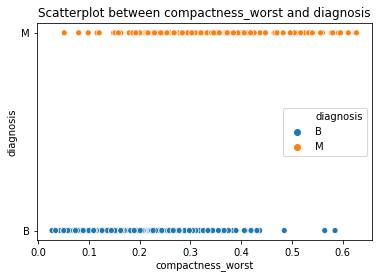

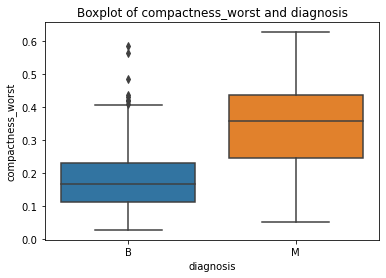

Relationship between compactness_worst and None

Ho:  There is no significant impact of compactness_worst on diagnosis (No predictability)
Ha:  There is a significant impact of compactness_worst on diagnosis (Good predictor)


Test Statistics:  16.141551490334763
p-value:  1.2486230925462624e-46 

Reject Ho,  There is a significant impact of compactness_worst on diagnosis (Good predictor)


In [293]:
analysis('compactness_worst', data=Xy_train)

In [294]:
# If the compactness_worst is higher, the chance that a tumor being malignent increases.

In [295]:
# compactness_worst can be a good predictor

#### concavity_worst

Description of concavity_worst: 
 count    455.000000
mean       0.271338
std        0.198851
min        0.000000
25%        0.116550
50%        0.226400
75%        0.387200
max        0.785500
Name: concavity_worst, dtype: float64 



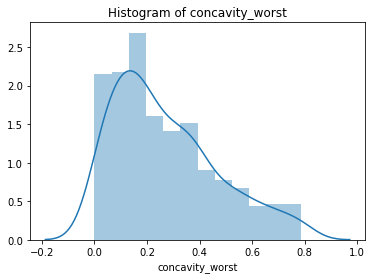

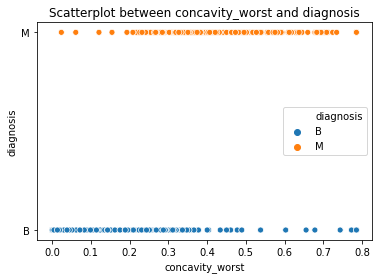

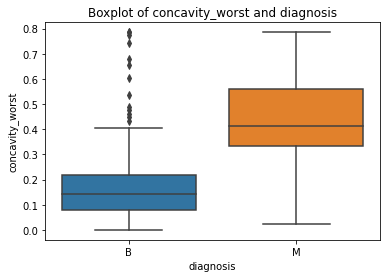

Relationship between concavity_worst and None

Ho:  There is no significant impact of concavity_worst on diagnosis (No predictability)
Ha:  There is a significant impact of concavity_worst on diagnosis (Good predictor)


Test Statistics:  19.450901614642497
p-value:  1.0474282116553244e-61 

Reject Ho,  There is a significant impact of concavity_worst on diagnosis (Good predictor)


In [296]:
analysis('concavity_worst', data=Xy_train)

In [297]:
# If the concavity_worst is higher, the chance that a tumor being malignent increases.

In [298]:
# concavity_worst can be a good predictor

#### concave_points_worst

Description of concave_points_worst: 
 count    455.000000
mean       0.114182
std        0.065326
min        0.000000
25%        0.063930
50%        0.098610
75%        0.161100
max        0.291000
Name: concave_points_worst, dtype: float64 



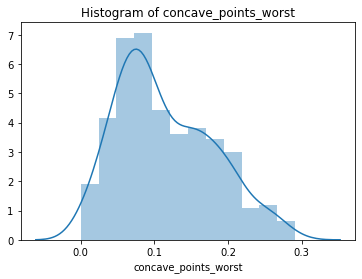

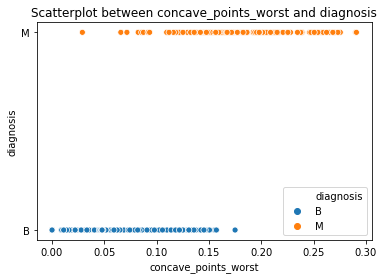

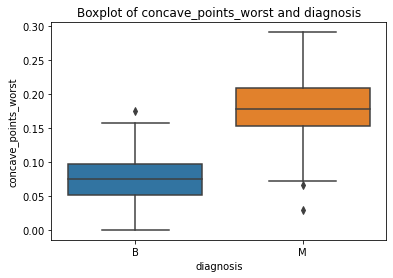

Relationship between concave_points_worst and None

Ho:  There is no significant impact of concave_points_worst on diagnosis (No predictability)
Ha:  There is a significant impact of concave_points_worst on diagnosis (Good predictor)


Test Statistics:  27.322007926349848
p-value:  7.751613661686535e-98 

Reject Ho,  There is a significant impact of concave_points_worst on diagnosis (Good predictor)


In [299]:
analysis('concave_points_worst', data=Xy_train)

In [300]:
# If the concave_points_worst is higher, the chance that a tumor being malignent increases.

In [301]:
# concave_points_worst can be a good predictor

#### symmetry_worst

Description of symmetry_worst: 
 count    455.000000
mean       0.287792
std        0.054435
min        0.156500
25%        0.249500
50%        0.282700
75%        0.317750
max        0.419150
Name: symmetry_worst, dtype: float64 



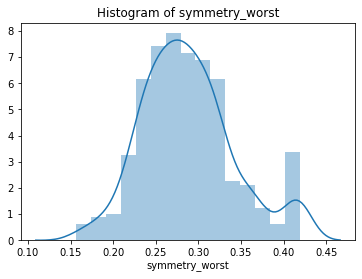

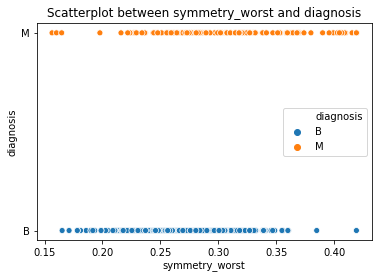

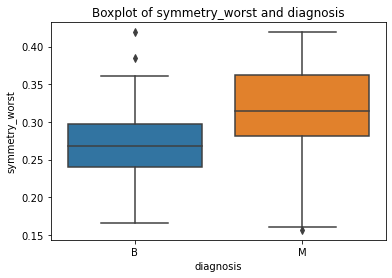

Relationship between symmetry_worst and None

Ho:  There is no significant impact of symmetry_worst on diagnosis (No predictability)
Ha:  There is a significant impact of symmetry_worst on diagnosis (Good predictor)


Test Statistics:  10.614501118601837
p-value:  1.1786286894239421e-23 

Reject Ho,  There is a significant impact of symmetry_worst on diagnosis (Good predictor)


In [302]:
analysis('symmetry_worst', data=Xy_train)

In [303]:
# If the symmetry_worst is higher, the chance that a tumor being malignent increases.

In [304]:
# symmetry_worst can be a good predictor

#### fractal_dimension_worst

Description of fractal_dimension_worst: 
 count    455.000000
mean       0.083330
std        0.016232
min        0.055040
25%        0.071050
50%        0.080060
75%        0.092070
max        0.123010
Name: fractal_dimension_worst, dtype: float64 



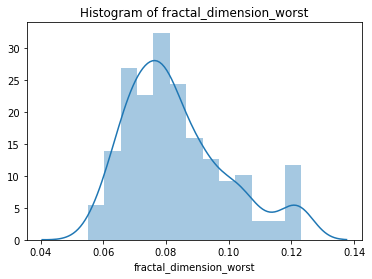

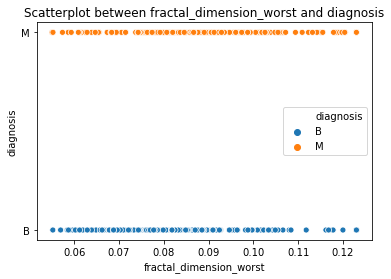

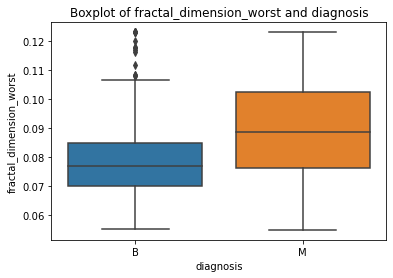

Relationship between fractal_dimension_worst and None

Ho:  There is no significant impact of fractal_dimension_worst on diagnosis (No predictability)
Ha:  There is a significant impact of fractal_dimension_worst on diagnosis (Good predictor)


Test Statistics:  7.082756262778362
p-value:  5.430260627458114e-12 

Reject Ho,  There is a significant impact of fractal_dimension_worst on diagnosis (Good predictor)


In [305]:
analysis('fractal_dimension_worst', data=Xy_train)

In [306]:
# If the fractal_dimension_worst is higher, the chance that a tumor being malignent increases.

In [307]:
# fractal_dimension_worst can be a good predictor

# Preprocessing

In [308]:
# Lets remove unnecessary variables

In [309]:
action

{'drop': ['fractal_dimension_mean',
  'texture_se',
  'smoothness_se',
  'symmetry_se']}

In [310]:
Xy_train.drop(action['drop'], axis=1, inplace=True)
Xy_test.drop(action['drop'], axis=1, inplace=True)

In [311]:
# Lets convert the diagnosis column to numeric

Xy_train = Xy_train.replace({'diagnosis': {
    'M': 1, 
    'B': 0
}})

Xy_test = Xy_test.replace({'diagnosis': {
    'M': 1,
    'B': 0
}})

In [312]:
Xy_train.diagnosis.head()

68     0
181    1
63     0
248    0
60     0
Name: diagnosis, dtype: int64

In [313]:
Xy_test.diagnosis.head()

204    0
70     1
131    1
431    0
540    0
Name: diagnosis, dtype: int64

In [314]:
# splitting the dataset

In [315]:
X_train = Xy_train.drop('diagnosis', axis=1)

y_train = Xy_train[['diagnosis']]

In [316]:
X_test = Xy_test.drop('diagnosis', axis=1)

y_test = Xy_test[['diagnosis']]

In [317]:
X_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
68            0.14130         0.28241              0.04375         0.2111   
181           0.22862         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2464   

     radius_se  perimeter_se  area_se  compactness_se  concavity_se  \
68      0.3274         1.885    17.67        0.061505      0.082490   
181     0.6298         4.414    81.46        0.047590      0.038720   
63      0.4098         2.608    23.52        0.039380      0.043120   
248     0.2497         1.497    16.64        0.010350      0.010810   
60      0.5158         3.312    34.62        0.010990      0.007665   

     concave_points_se  fractal_dimension_se  radius_worst  texture_worst  \
68            0.025318              0.008023         10.31          22.65   
181           0.015670              0.005295         26.68          33.48   
63            0.015600              0.005822         10.01          19.23   
248           0.006245              0.002619         12.25          35.19   
60            0.008193              0.005953         11.02          17.45   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
68             65.50      324.70           0.14820            0.43650   
181           176.50     1937.05           0.14910            0.62695   
63             65.59      310.10           0.09836            0.16780   
248            77.98      455.70           0.14990            0.13980   
60             69.86      368.60           0.12750            0.09866   

     concavity_worst  concave_points_worst  symmetry_worst  \
68           0.78550               0.17500         0.41915   
181          0.67800               0.29030         0.40980   
63           0.13970               0.05087         0.32820   
248          0.11250               0.06136         0.34090   
60           0.02168               0.02579         0.35570   

     fractal_dimension_worst  
68                   0.11750  
181                  0.12301  
63                   0.08490  
248                  0.08147  
60                   0.08020

In [318]:
X_test.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
204        12.47         18.60           81.09      481.9          0.09965   
70         18.94         21.31          123.60     1130.0          0.09009   
131        15.46         19.48          101.70      748.9          0.10920   
431        12.40         17.68           81.47      467.8          0.10540   
540        11.54         14.44           74.65      402.9          0.09984   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
204            0.1058         0.08005              0.03821         0.1925   
70             0.1029         0.10800              0.07951         0.1582   
131            0.1223         0.14660              0.08087         0.1931   
431            0.1316         0.07741              0.02799         0.1811   
540            0.1120         0.06737              0.02594         0.1818   

     radius_se  perimeter_se  area_se  compactness_se  concavity_se  \
204     0.3961         2.497    30.29         0.01911       0.02701   
70      0.7888         5.486    86.20         0.01652       0.02269   
131     0.4743         3.094    48.31         0.01484       0.02813   
431     0.1767         2.204    15.43         0.03295       0.04861   
540     0.2784         1.628    20.86         0.04112       0.05553   

     concave_points_se  fractal_dimension_se  radius_worst  texture_worst  \
204            0.01037              0.003586         14.97          24.64   
70             0.01370              0.001698         24.86          26.58   
131            0.01093              0.002461         19.26          26.00   
431            0.01167              0.006005         12.88          22.91   
540            0.01494              0.005512         12.26          19.68   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
204            96.05       677.9            0.1426             0.2378   
70            165.90      1866.0            0.1193             0.2336   
131           124.90      1156.0            0.1546             0.2394   
431            89.61       515.8            0.1450             0.2629   
540            78.78       457.8            0.1345             0.2118   

     concavity_worst  concave_points_worst  symmetry_worst  \
204           0.2671               0.10150          0.3014   
70            0.2687               0.17890          0.2551   
131           0.3791               0.15140          0.2837   
431           0.2403               0.07370          0.2556   
540           0.1797               0.06918          0.2329   

     fractal_dimension_worst  
204                  0.08750  
70                   0.06589  
131                  0.08019  
431                  0.09359  
540                  0.08134

In [319]:
y_train.head()

diagnosis
68           0
181          1
63           0
248          0
60           0

In [320]:
y_test.head()

diagnosis
204          0
70           1
131          1
431          0
540          0

In [321]:
# Lets create scaled versions of data

In [322]:
from sklearn.preprocessing import StandardScaler

ssx = StandardScaler()

X_train_s = ssx.fit_transform(X_train)
X_test_s = ssx.transform(X_test)

In [323]:
X_train_s.shape

(455, 26)

In [324]:
y_train.shape

(455, 1)

In [325]:
X_test_s.shape

(114, 26)

In [326]:
y_test.shape

(114, 1)

# Model 1: Logistic Regression

In [327]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [328]:
model1.fit(X_train_s, y_train)

LogisticRegression()

In [329]:
y_pred = model1.predict(X_test_s)

In [330]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

In [331]:
y_test.values.flatten()

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [332]:
y_pred_proba = model1.predict_proba(X_test_s)

## Model Evaluation

#### Accuracy

In [333]:
from sklearn.metrics import accuracy_score
model1_acc = accuracy_score(y_test, y_pred)

In [334]:
model1_acc

0.9824561403508771

#### Precision

In [335]:
from sklearn.metrics import precision_score
model1_pre = precision_score(y_test, y_pred)

In [336]:
model1_pre

0.9767441860465116

#### Classification report

In [337]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### Confusion matrix

In [338]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[['Actual','Actual'],['B','M']],
            columns=[['Prediction','Prediction'],['B','M']])
cm

Prediction    
                  B   M
Actual B         70   1
       M          1  42

In [339]:
model1_acc_B = cm['Prediction']['B']['Actual']['B']/(cm['Prediction']['B']['Actual']['B'] + cm['Prediction']['B']['Actual']['M'])
model1_acc_B

0.9859154929577465

In [340]:
model1_acc_M = cm['Prediction']['M']['Actual']['M']/(cm['Prediction']['M']['Actual']['B'] + cm['Prediction']['M']['Actual']['M'])
model1_acc_M

0.9767441860465116

#### log loss

In [341]:
from sklearn.metrics import log_loss
model1_log = log_loss(y_test, y_pred_proba[:,1])

In [342]:
model1_log

0.05378492824917088

#### ROC 

In [343]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, th = roc_curve(y_test, y_pred_proba[:,1])
model1_auc = auc(fpr, tpr)
model1_auc

0.9977071732721913

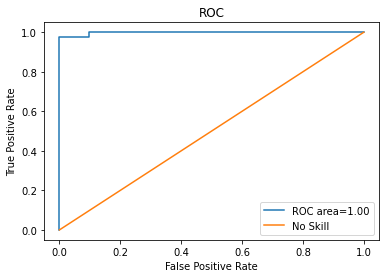

In [344]:
plt.figure()
plt.plot(fpr, tpr, label='ROC area=%.2f'%model1_auc)
plt.plot([0,1],[0,1], label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

# Model 2: Decision Tree Classification

In [345]:
from sklearn.tree import DecisionTreeClassifier

In [346]:
model2 = DecisionTreeClassifier()

In [347]:
# Decision tree does not need variables to be scaled, so we can use unscaled versions of data.
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [348]:
y_pred = model2.predict(X_test)

In [349]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [350]:
y_test.values.flatten()

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [351]:
y_pred_proba = model2.predict_proba(X_test)

## Model Evaluation

#### Accuracy

In [352]:
from sklearn.metrics import accuracy_score
model2_acc = accuracy_score(y_test, y_pred)

In [353]:
model2_acc

0.9210526315789473

#### Precision

In [354]:
from sklearn.metrics import precision_score
model2_pre = precision_score(y_test, y_pred)

In [355]:
model2_pre

0.8863636363636364

#### Classification report

In [356]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



#### Confusion matrix

In [357]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[['Actual','Actual'],['B','M']],
            columns=[['Prediction','Prediction'],['B','M']])
cm

Prediction    
                  B   M
Actual B         66   5
       M          4  39

In [358]:
model2_acc_B = cm['Prediction']['B']['Actual']['B']/(cm['Prediction']['B']['Actual']['B'] + cm['Prediction']['B']['Actual']['M'])
model2_acc_B

0.9428571428571428

In [359]:
model2_acc_M = cm['Prediction']['M']['Actual']['M']/(cm['Prediction']['M']['Actual']['B'] + cm['Prediction']['M']['Actual']['M'])
model2_acc_M

0.8863636363636364

#### log loss

In [360]:
from sklearn.metrics import log_loss
model2_log = log_loss(y_test, y_pred_proba[:,1])

In [361]:
model2_log

2.726780574924098

#### ROC 

In [362]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, th = roc_curve(y_test, y_pred_proba[:,1])
model2_auc = auc(fpr, tpr)
model2_auc

0.9182771044873894

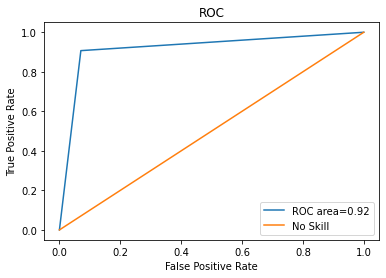

In [363]:
plt.figure()
plt.plot(fpr, tpr, label='ROC area=%.2f'%model2_auc)
plt.plot([0,1],[0,1], label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [364]:
# Decision tree is not performing well compared to the logistic regression model

# Model 3: Random Forest

In [365]:
from sklearn.ensemble import RandomForestClassifier

In [366]:
model3 = RandomForestClassifier()

In [367]:
model3.fit(X_train, y_train)

RandomForestClassifier()

In [368]:
y_pred = model3.predict(X_test)

In [369]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [370]:
y_test.values.flatten()

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [371]:
y_pred_proba = model3.predict_proba(X_test)

## Model Evaluation

#### Accuracy

In [372]:
from sklearn.metrics import accuracy_score
model3_acc = accuracy_score(y_test, y_pred)

In [373]:
model3_acc

0.9649122807017544

#### Precision

In [374]:
from sklearn.metrics import precision_score
model3_pre = precision_score(y_test, y_pred)

In [375]:
model3_pre

0.975609756097561

#### Classification report

In [376]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### Confusion matrix

In [377]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[['Actual','Actual'],['B','M']],
            columns=[['Prediction','Prediction'],['B','M']])
cm

Prediction    
                  B   M
Actual B         70   1
       M          3  40

In [378]:
model3_acc_B = cm['Prediction']['B']['Actual']['B']/(cm['Prediction']['B']['Actual']['B'] + cm['Prediction']['B']['Actual']['M'])
model3_acc_B

0.958904109589041

In [379]:
model3_acc_M = cm['Prediction']['M']['Actual']['M']/(cm['Prediction']['M']['Actual']['B'] + cm['Prediction']['M']['Actual']['M'])
model3_acc_M

0.975609756097561

#### log loss

In [380]:
from sklearn.metrics import log_loss
model3_log = log_loss(y_test, y_pred_proba[:,1])

In [381]:
model3_log

0.09968785200659017

#### ROC 

In [382]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, th = roc_curve(y_test, y_pred_proba[:,1])
model3_auc = auc(fpr, tpr)
model3_auc

0.9954143465443827

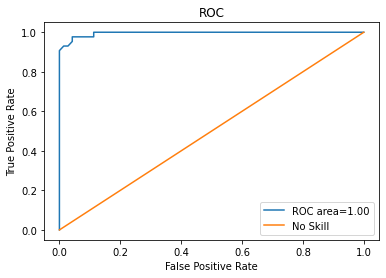

In [383]:
plt.figure()
plt.plot(fpr, tpr, label='ROC area=%.2f'%model3_auc)
plt.plot([0,1],[0,1], label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

# Model 4: Support Vector Machines (SVM)

In [384]:
from sklearn.svm import SVC

In [385]:
# Support Vector machine needs the data to be standardised, so we can use the standardised version of data
model4 = SVC(probability=True)

In [386]:
model4.fit(X_train_s, y_train)

SVC(probability=True)

In [387]:
y_pred = model4.predict(X_test_s)

In [388]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [389]:
y_test.values.flatten()

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [390]:
y_pred_proba = model4.predict_proba(X_test_s)

## Model Evaluation

#### Accuracy

In [391]:
from sklearn.metrics import accuracy_score
model4_acc = accuracy_score(y_test, y_pred)

In [392]:
model4_acc

0.9649122807017544

#### Precision

In [393]:
from sklearn.metrics import precision_score
model4_pre = precision_score(y_test, y_pred)

In [394]:
model4_pre

0.9534883720930233

#### Classification report

In [395]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



#### Confusion matrix

In [396]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[['Actual','Actual'],['B','M']],
            columns=[['Prediction','Prediction'],['B','M']])
cm

Prediction    
                  B   M
Actual B         69   2
       M          2  41

In [397]:
model4_acc_B = cm['Prediction']['B']['Actual']['B']/(cm['Prediction']['B']['Actual']['B'] + cm['Prediction']['B']['Actual']['M'])
model4_acc_B

0.971830985915493

In [398]:
model4_acc_M = cm['Prediction']['M']['Actual']['M']/(cm['Prediction']['M']['Actual']['B'] + cm['Prediction']['M']['Actual']['M'])
model4_acc_M

0.9534883720930233

#### log loss

In [399]:
from sklearn.metrics import log_loss
model4_log = log_loss(y_test, y_pred_proba[:,1])

In [400]:
model4_log

0.08192246563671816

#### ROC 

In [401]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, th = roc_curve(y_test, y_pred_proba[:,1])
model4_auc = auc(fpr, tpr)
model4_auc

0.9967245332459875

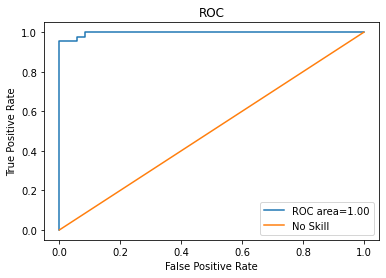

In [402]:
plt.figure()
plt.plot(fpr, tpr, label='ROC area=%.2f'%model4_auc)
plt.plot([0,1],[0,1], label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

# Model Comparison

In [403]:
model_comp = {
    'model': ['Logistic', 'Decision tree', 'Random Forest', 'Support Vector Machine'],
    'accuracy': [model1_acc, model2_acc, model3_acc, model4_acc],
    'accuracy_of_Malignent(1)': [model1_acc_M, model2_acc_M, model3_acc_M, model4_acc_M],
    'accuracy_of_Benign(0)': [model1_acc_B, model2_acc_B, model3_acc_B, model4_acc_B],
    'AUC': [model1_auc, model2_auc, model3_auc, model4_auc]
}

In [404]:
model_comp = pd.DataFrame(model_comp)

In [405]:
model_comp

model  accuracy  accuracy_of_Malignent(1)  \
0                Logistic  0.982456                  0.976744   
1           Decision tree  0.921053                  0.886364   
2           Random Forest  0.964912                  0.975610   
3  Support Vector Machine  0.964912                  0.953488   

   accuracy_of_Benign(0)       AUC  
0               0.985915  0.997707  
1               0.942857  0.918277  
2               0.958904  0.995414  
3               0.971831  0.996725